In [335]:
import json
from datetime import date
from collections import defaultdict
import gzip
import pandas as pd
import scipy.stats as stats

In [4]:
LABELS_FILE = "../source_dataset_files/wikidata-20210215-dwd-v2/labels.en.tsv.gz"
DESCRIPTIONS_FILE = "../source_dataset_files/wikidata-20210215-dwd-v2/descriptions.en.tsv.gz"
P279_EDGES_FILE = "../source_dataset_files/wikidata-20210215-dwd-v2/derived.P279.tsv.gz"
P279STAR_EDGES_FILE = "../source_dataset_files/wikidata-20210215-dwd-v2/derived.P279star.tsv.gz"
P31P279STAR_EDGES_FILE = "../source_dataset_files/wikidata-20210215-dwd-v2/derived.P31P279star.tsv.gz"
P31_EDGES_FILE = "../source_dataset_files/wikidata-20210215-dwd-v2/derived.P31.tsv.gz"

In [5]:
COMPOSITIONAL_FILE = "../data/analogical_proj/compositional.tsv"
ANALOGICAL_TEST_FILE = "../data/analogical_proj/Analogical_Test_File.csv"
P31P279STAR_NODE2_COUNTS_FILE = "../data/analogical_proj/P31279star.node2.counts.json"
P31_PARENT_CHILD_DICT_FILE = "../data/analogical_proj/P31_parent_child_dict.json"

In [6]:
GOOGLE_PROJ_FILEPATH = "../data/analogical_proj/emb_files_for_google_projections/"

In [275]:
SEM_EVAL_FILEPATH = "../data/analogical_proj/SemEval-2012-Complete"
SEM_EVAL_GENERATED_FILE = '../data/analogical_proj/SemEval2012.csv'
SEM_EVAL_GENERATED_FINAL_FILE = '../data/analogical_proj/SemEval2012_final.csv'
SEM_EVAL_GENERATED_FINAL_COMPLEX_FILE = '../data/analogical_proj/SemEval2012_final_complex.csv'

In [8]:
COMPLEX_EMB_SOURCE_FILE = "../source_dataset_files/wikidata-20210215-dwd-v2/wikidatadwd.complEx.graph-embeddings.txt"

# Initial Analysis

In [10]:
# !isa_file=../data/P279_dataset/wikidata-P279.tsv
# !labels_file=../data/labels.en.tsv
!kgtk query -i ../source_dataset_files/wikidata-20210215-dwd-v2/derived.P279.tsv.gz -i ../source_dataset_files/wikidata-20210215-dwd-v2/labels.en.tsv.gz \
--match 'i: (x)-[:P279]->(y), l: (x)-[:label]->(lbl), (y)-[:label]->(lbl2)' \
--where 'lbl =~ ".* .*" AND instr(kgtk_unstringify(kgtk_lqstring_text(lbl)), kgtk_unstringify(kgtk_lqstring_text(lbl2))) AND lbl!=lbl2' \
--return 'distinct x as node1, y as node2, kgtk_lqstring_text_string(lbl), kgtk_lqstring_text_string(lbl2)' \
-o ../data/analogical_proj/compositional.tsv


In [11]:
!head ../data/analogical_proj/compositional.tsv

node1	node2	kgtk_lqstring_text_string(graph_2_c2."node2")	kgtk_lqstring_text_string(graph_2_c3."node2")
Q1000064	Q11016	"nuclear reactor technology"	"technology"
Q1000120	Q12510	"maximal torus"	"torus"
Q100061973	Q1799072	"presentation method"	"method"
Q1000828	Q918385	"team training"	"training"
Q1000850	Q748	"Buddhism in Germany"	"Buddhism"
Q1000859	Q748	"Buddhism in Iceland"	"Buddhism"
Q1000861	Q748	"Buddhism in Ireland"	"Buddhism"
Q1000863	Q376	"master clock"	"clock"
Q1000869	Q748	"Buddhism in Bangladesh"	"Buddhism"


In [12]:
import pandas as pd

comp = pd.read_csv(COMPOSITIONAL_FILE, sep='\t')

In [13]:
comp['node1_len'] = comp.node1.apply(lambda p: len(p))
comp['node2_len'] = comp.node2.apply(lambda p: len(p))
comp = comp.sort_values(by=['node1_len', 'node2_len'])

In [14]:
comp.head()

,node1,node2,"kgtk_lqstring_text_string(graph_2_c2.""node2"")","kgtk_lqstring_text_string(graph_2_c3.""node2"")",node1_len,node2_len
233844,Q561,Q553,human tooth,tooth,4,4
454979,Q825,Q190,God in Christianity,God,4,4
219269,Q416,Q41298,disk magazine,magazine,4,6
460735,Q944,Q41217,quantum mechanics,mechanics,4,6
206360,Q305,Q186361,corporal punishment,punishment,4,7


In [15]:
from tabulate import tabulate

In [16]:
comp[:50].sample(n=25, random_state=13)

,node1,node2,"kgtk_lqstring_text_string(graph_2_c2.""node2"")","kgtk_lqstring_text_string(graph_2_c3.""node2"")",node1_len,node2_len
427360,Q6745,Q6718,down quark,quark,5,5
206360,Q305,Q186361,corporal punishment,punishment,4,7
250186,Q5886,Q523,OB star,star,5,4
427575,Q6778,Q6718,top quark,quark,5,5
233844,Q561,Q553,human tooth,tooth,4,4
223319,Q4812,Q527,day sky,sky,5,4
219582,Q4188,Q3937,superluminous supernova,supernova,5,5
455613,Q8465,Q198,civil war,war,5,4
448203,Q7141,Q420,cell biology,biology,5,4
220067,Q426,Q2386606,animal rights,right,4,8


In [17]:
print(tabulate(comp[:50].sample(n=25, random_state=13), headers = 'keys', tablefmt = 'simple'))

        node1    node2      kgtk_lqstring_text_string(graph_2_c2."node2")    kgtk_lqstring_text_string(graph_2_c3."node2")      node1_len    node2_len
------  -------  ---------  -----------------------------------------------  -----------------------------------------------  -----------  -----------
427360  Q6745    Q6718      down quark                                       quark                                                      5            5
206360  Q305     Q186361    corporal punishment                              punishment                                                 4            7
250186  Q5886    Q523       OB star                                          star                                                       5            4
427575  Q6778    Q6718      top quark                                        quark                                                      5            5
233844  Q561     Q553       human tooth                                      tooth            

In [18]:
comp.sample(n=20, random_state=13)

,node1,node2,"kgtk_lqstring_text_string(graph_2_c2.""node2"")","kgtk_lqstring_text_string(graph_2_c3.""node2"")",node1_len,node2_len
349093,Q62247423,Q8054,"hypothetical protein, conserved",protein,9,5
227648,Q5165876,Q567696,Control order,order,8,7
418482,Q66514842,Q66514840,medial lumbar intertransversarius,lumbar intertransversarius,9,9
344574,Q62234654,Q8054,"Soluble NSF attachment protein, SNAP, putative",protein,9,5
59297,Q22336657,Q8054,Rhodanese domain-containing protein lpg1850,protein,9,5
202225,Q28561607,Q8054,Centrosomal protein 70,protein,9,5
286645,Q60016122,Q8054,"protein UIS3, putative",protein,9,5
226797,Q51156346,Q55550972,first Sunday in September,Sunday in September,9,9
171334,Q24223110,Q8054,GTP-binding tyrosin phosphorylated protein blr...,protein,9,5
41967,Q22233113,Q8054,Hypothetical protein Rv2024c,protein,9,5


In [19]:
print(tabulate(comp.sample(n=20, random_state=13), headers = 'keys', tablefmt = 'simple'))

        node1       node2      kgtk_lqstring_text_string(graph_2_c2."node2")                                                                       kgtk_lqstring_text_string(graph_2_c3."node2")                                                                node1_len    node2_len
------  ----------  ---------  ------------------------------------------------------------------------------------------------------------------  ---------------------------------------------------------------------------------------------------------  -----------  -----------
349093  Q62247423   Q8054      hypothetical protein, conserved                                                                                     protein                                                                                                              9            5
227648  Q5165876    Q567696    Control order                                                                                                       order           

# Determine Top Parents based on transitive child count

In [21]:
import pandas as pd
import gzip

p279StarDF = pd.read_csv(P279STAR_EDGES_FILE, sep='\t', compression='gzip')

In [22]:
p279StarDF_node2_counts = p279StarDF.node2.value_counts()

In [23]:
p279StarDF_node2_counts = p279StarDF_node2_counts.sort_values(ascending=False)

In [24]:
p279StarDF_node2_counts[:20]

Q35120       2461205
Q99527517    2254395
Q28813620    1362928
Q16887380    1362453
Q488383      1286224
Q20937557    1267086
Q58415929    1201237
Q4406616     1175201
Q223557      1164914
Q6671777     1122327
Q337060      1079444
Q7184903     1072353
Q219858      1057006
Q50365914    1056956
Q23958946    1038338
Q97669203    1007383
Q15712714    1007381
Q3511065     1007335
Q3771876     1004686
Q37500013    1004683
Name: node2, dtype: int64

In [25]:
import requests

for qnode,qnode_count in zip(p279StarDF_node2_counts[:100].index, p279StarDF_node2_counts[:100]):
    print(qnode+','+requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['labels']['en'][0] + "," + str(qnode_count))

Q35120,entity,2461205
Q99527517,collection entity,2254395
Q28813620,set,1362928
Q16887380,group,1362453
Q488383,object,1286224
Q20937557,series,1267086
Q58415929,spatio-temporal entity,1201237
Q4406616,concrete object,1175201
Q223557,physical object,1164914
Q6671777,structure,1122327
Q337060,perceptible object,1079444
Q7184903,abstract object,1072353
Q219858,zone,1057006
Q50365914,biological region,1056956
Q23958946,individual entity,1038338
Q97669203,molecular conformation,1007383
Q15712714,biomolecular structure,1007381
Q3511065,biological sequence,1007335
Q3771876,nucleic acid structure,1004686
Q37500013,primary structure,1004683
Q863908,nucleic acid sequence,1004680
Q7187,gene,1004634
Q103940464,continuant,1003327
Q53617489,independent continuant,1003326
Q27043950,anatomical entity,1003324
Q28732711,physical substance,977520
Q4503801,part and whole,969424
Q1310239,component,960112
Q20747295,protein-coding gene,942018
Q58416391,spatial entity,927235
Q43460564,chemical entity,894601


# Analyze Parents

In [4]:
import pandas as pd
import gzip
from collections import defaultdict
from tqdm.notebook import tqdm

# p31p279StarDF_node2_counts_dict = defaultdict(int)
# p31p279StarDF_parent_child_dict = defaultdict(list)
# with gzip.open(P31P279STAR_EDGES_FILE) as fIN:
#     first_line = True
#     for line in tqdm(fIN, total=1779066990):
#         if first_line:
#             first_line = False
#             continue
#         line_s = line.decode("utf-8").strip().split('\t')
#         p31p279StarDF_node2_counts_dict[line_s[2]] += 1
#         p31p279StarDF_parent_child_dict[line_s[2]].append(line_s[0])
# json.dump(p31p279StarDF_node2_counts_dict, open(P31P279STAR_NODE2_COUNTS_FILE, 'w'))

p31p279StarDF_node2_counts_dict = json.load(open(P31P279STAR_NODE2_COUNTS_FILE))

In [5]:
# P31_parent_child_dict = defaultdict(set)
# with gzip.open(P31_EDGES_FILE) as fIN:
#     first_line = True
#     for line in tqdm(fIN):
#         if first_line:
#             first_line = False
#             continue
#         line_s = line.decode("utf-8").strip().split('\t')
#         P31_parent_child_dict[line_s[3]].add(line_s[1])
# for parent in P31_parent_child_dict:
#     P31_parent_child_dict[parent] = list(P31_parent_child_dict[parent])
# json.dump(P31_parent_child_dict, open(P31_PARENT_CHILD_DICT_FILE, 'w'))
P31_parent_child_dict = json.load(open(P31_PARENT_CHILD_DICT_FILE))
for parent in P31_parent_child_dict:
    P31_parent_child_dict[parent] = set(P31_parent_child_dict[parent])

In [6]:
from collections import defaultdict
from tqdm.notebook import tqdm

child_parent_dict = defaultdict(set)
parent_child_dict = defaultdict(set)
with gzip.open(P279_EDGES_FILE) as fIN:
    first_line = True
    for line in tqdm(fIN):
        if first_line:
            first_line = False
            continue
        line_s = line.decode("utf-8").strip().split('\t')
        child_parent_dict[line_s[1]].add(line_s[3])
        parent_child_dict[line_s[3]].add(line_s[1])

0it [00:00, ?it/s]

In [7]:
max_depths = {}
min_depths = {}

def find_max_depth(qnode, depth=0, visited=set()):
    global parent_child_dict
#     print(qnode, depth, visited)
    if qnode not in parent_child_dict:
        return depth
    max_val = depth
    for child in parent_child_dict[qnode]:
        if child not in visited:
            if child not in max_depths:
                max_depths[child] = find_max_depth(child, depth+1, visited | {child})
            max_val = max(max_val, max_depths[child])
    return max_val

def find_min_depth(qnode, depth=0, visited=set()):
    global parent_child_dict
#     print(qnode, depth, visited)
    if qnode not in parent_child_dict:
        return depth
    min_val = float('inf')
    for child in parent_child_dict[qnode]:
        if child not in visited:
            if child not in min_depths:
                min_depths[child] = find_min_depth(child, depth+1, visited | {child})
            min_val = min(min_val, min_depths[child])
    if min_val == float('inf'):
        return depth
    else:
        return min_val

In [8]:
import numpy as np
def entropy_of_children(qnode):
    entropy_sum = 0
    for child in parent_child_dict[qnode]:
        if child in p279StarDF_node2_counts_dict:
            assert p279StarDF_node2_counts_dict[child] <= p279StarDF_node2_counts_dict[qnode], (child, qnode)
            entropy_sum -= p279StarDF_node2_counts_dict[child] / p279StarDF_node2_counts_dict[qnode] * np.log2(p279StarDF_node2_counts_dict[child] / p279StarDF_node2_counts_dict[qnode])
    return float(entropy_sum)

In [9]:
import scipy.stats as st
import numpy as np
def entropy_of_children_v_inst(qnode, debug=False):
    entropy_sum = 0
    if p31p279StarDF_node2_counts_dict[qnode] == 0:
        return "N/A"
    for child in parent_child_dict[qnode]:
        if child in p31p279StarDF_node2_counts_dict:
            assert p31p279StarDF_node2_counts_dict[child] <= p31p279StarDF_node2_counts_dict[qnode], (child, qnode)
            if p31p279StarDF_node2_counts_dict[child] == 0:
                continue
            entropy_sum -= p31p279StarDF_node2_counts_dict[child] / p31p279StarDF_node2_counts_dict[qnode] * np.log2(p31p279StarDF_node2_counts_dict[child] / p31p279StarDF_node2_counts_dict[qnode])
    return float(entropy_sum)
#     if debug:
#         print([(child,p31p279StarDF_node2_counts_dict[child]) for child in parent_child_dict[qnode]])
# #     arr = np.array([p31p279StarDF_node2_counts_dict[child] for child in parent_child_dict[qnode] if p31p279StarDF_node2_counts_dict[child] != 0])
# #     return -np.sum(arr / np.sum(arr) * np.log(arr / np.sum(arr)))
# #     print(sum([p31p279StarDF_node2_counts_dict[child] for child in parent_child_dict[qnode]]))
#     return st.entropy([p31p279StarDF_node2_counts_dict[child] for child in parent_child_dict[qnode]])

In [10]:
def get_reduction_ratio(qnode, parent=None):
    if parent is None:
        return [round(p31p279StarDF_node2_counts_dict[qnode] / p31p279StarDF_node2_counts_dict[parent],2) for parent in child_parent_dict[qnode] if p31p279StarDF_node2_counts_dict[parent] != 0]
    else:
        return round(p31p279StarDF_node2_counts_dict[qnode] / p31p279StarDF_node2_counts_dict[parent],2) if p31p279StarDF_node2_counts_dict[parent] != 0 else None

In [11]:
def find_leaves(qnode, visited=set()):
    if qnode in visited:
        return set()
    if qnode not in parent_child_dict:
        if qnode in P31_parent_child_dict:
            return P31_parent_child_dict[qnode]
        else:
            return set()
    children = set()
    for child in parent_child_dict[qnode]:
        children |= find_leaves(child, visited | {qnode})
    return children

In [12]:
def compute_overlap_ratio(node1, node2):
    if node1 == node2:
        return 0
    if node1 not in parent_child_dict:
        return 0        
    if node2 not in parent_child_dict:
        return 0
    node1_set = (find_leaves(node1))
    node2_set = (find_leaves(node2))
    if len(node1_set | node2_set) == 0:
        return 0
    return len(node1_set & node2_set) / len(node1_set | node2_set)

In [ ]:
# newRows = []
# for _, row in tqdm(top_parents.iterrows()):
#     row['child_count'] = len(parent_child_dict[row['qnode']])
#     row['max_no_of_siblings'] = max([len(parent_child_dict[parent]) - 1 for parent in child_parent_dict[row['qnode']]]) if child_parent_dict[row['qnode']] else 0
#     row['min_no_of_siblings'] = min([len(parent_child_dict[parent]) - 1 for parent in child_parent_dict[row['qnode']]]) if child_parent_dict[row['qnode']] else 0
#     row['max_depth'] = find_max_depth(row['qnode'])
#     row['min_depth'] = find_min_depth(row['qnode'])
#     row['entropy'] = entropy_of_children(row['qnode'])
#     row['red_ratios'] = get_reduction_ratio(row['qnode'])
#     newRows.append(row)

In [ ]:
# parent_child_dict['Q2424752']

In [ ]:
# pd.DataFrame(newRows)

In [ ]:
# pd.DataFrame(newRows).to_csv('../data/Analogical_Dataset/top_parents_analysis.csv',index=None)

## Ontology Generator

Analyze Product (Q15401930) Ontology

In [13]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    GRAY = '\033[37m'

In [135]:
import requests
def fetch_label(qnode):
    try:
        return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['labels']['en'][0]
    except:
        return str(False)

In [136]:
import requests
def fetch_desc(qnode):
    try:
        return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['descriptions']['en'][0]
    except:
        return str(False)

In [40]:
def print_ontology_subtree(ont_obj, first_sibling, max_children, compute_overlap=False, superparent=None):
    
#     print(ont_obj)
    _, qnode, parent, levels, start_level, tree_prefix, children = ont_obj
    
    if superparent is None:
        superparent = qnode
    
    overlap_thresh = 0.5
    
    ent = entropy_of_children_v_inst(qnode)
    ent = round(ent, 2) if ent != 'N/A' else ent
    child_count = len(parent_child_dict[qnode])
    inst_count = p31p279StarDF_node2_counts_dict[qnode]
    max_siblings = max([len(parent_child_dict[parent]) - 1 for parent in child_parent_dict[qnode]]) if child_parent_dict[qnode] else 0
    min_siblings = min([len(parent_child_dict[parent]) - 1 for parent in child_parent_dict[qnode]]) if child_parent_dict[qnode] else 0
    red_ratio = get_reduction_ratio(qnode, parent) if parent is not None else '-'
    superP_red_ratio = get_reduction_ratio(qnode, superparent) if superparent is not None else '-'
    overlap_ratio = round(compute_overlap_ratio(first_sibling, qnode),2) if compute_overlap else 0
    node_color = bcolors.GRAY if overlap_ratio >= overlap_thresh else ''
    
    if levels >= start_level - 7:
        ret_str = f"{node_color}{tree_prefix}── {fetch_label(qnode)}: {qnode}{bcolors.ENDC}\
= {bcolors.OKBLUE}ch:{child_count}{bcolors.ENDC}, \
{bcolors.FAIL}ins:{inst_count}{bcolors.ENDC},\
{bcolors.OKGREEN}maxs:{max_siblings}{bcolors.ENDC},\
{bcolors.OKCYAN}mins:{min_siblings}{bcolors.ENDC},\
{bcolors.BOLD}e:{ent}{bcolors.ENDC},\
{bcolors.UNDERLINE}RR:{red_ratio}{bcolors.ENDC},SPRR:{superP_red_ratio}{',OR:'+str(overlap_ratio) if overlap_ratio != 0 else ''}"
    else:
        ret_str = f"{node_color}{tree_prefix}── {fetch_label(qnode)}: {qnode}{bcolors.ENDC}\
= {bcolors.OKBLUE}ch:{child_count}{bcolors.ENDC},\
{bcolors.FAIL}ins:{inst_count}{bcolors.ENDC},\
{bcolors.BOLD}e:{ent}{bcolors.ENDC},\
{bcolors.UNDERLINE}RR:{red_ratio}{bcolors.ENDC},SPRR:{superP_red_ratio}{',OR:'+str(overlap_ratio) if overlap_ratio != 0 else ''}"
            
    print(ret_str)
    if overlap_ratio < overlap_thresh:
        for child in children[:max_children]:
            print_ontology_subtree(child, children[0][1], max_children, compute_overlap, superparent)

In [52]:
def generate_ontology_tree(qnode, tree_prefix, levels, start_level, parent=None, superparent=None):
    
    if prune_here(qnode, parent, levels, start_level, superparent):
        return None
    
    if superparent is None:
        superparent = qnode
    
#     print(ret_str)
    if levels == 1:
        return (p31p279StarDF_node2_counts_dict[qnode], qnode, parent, levels, start_level, tree_prefix, [])
    
    children = []
    
    for child in parent_child_dict[qnode]:
        temp = generate_ontology_tree(child, tree_prefix + '   ├', levels - 1, start_level, qnode, superparent)
        if temp is not None:
#             print(temp)
            children += [temp]
    if len(children) > 0:
#         print((children))
        children.sort(key=lambda p: -p[0])
    return (p31p279StarDF_node2_counts_dict[qnode], qnode, parent, levels, start_level, tree_prefix, children)

def prune_here(qnode, parent, levels, start_level, superparent):
    ent = entropy_of_children_v_inst(qnode)
    inst_count = p31p279StarDF_node2_counts_dict[qnode]
    red_ratio = get_reduction_ratio(qnode, parent) if parent is not None else None
    superP_red_ratio = get_reduction_ratio(qnode, superparent) if superparent is not None else None
    
#     if fetch_label(qnode) == fetch_label(parent):
#         return True
#     if start_level - levels <= 1:
#         return False
    if inst_count < 1000:
        return True
    if red_ratio is not None and not(0.15 <= red_ratio):
        return True
    if start_level - levels <= 3 and ent >= 1:
        return False
    if superP_red_ratio is not None and not(0.05 <= superP_red_ratio):
        return True
#     if ent < 1:
#         return True
    
    return False

### Candidate 1

Allowed children rules (excluding top 2 levels):

inst count >= 1000

red_ratio >= 0.15

overlap ratio with top non-pruned sibling < 0.5

In [46]:
print_ontology_subtree(generate_ontology_tree('Q15401930', " ├", levels=20, start_level=20, parent=None), first_sibling=None, max_children=100, compute_overlap=True)

 ├── product: Q15401930= ch:17, ins:17979820,maxs:55,mins:55,e:0.3,RR:-,SPRR:1.0
 ├   ├── work: Q386724= ch:117, ins:17735874,maxs:42,mins:16,e:3.07,RR:0.99,SPRR:0.99
 ├   ├   ├── intellectual work: Q15621286= ch:33, ins:12661271,maxs:116,mins:116,e:0.64,RR:0.71,SPRR:0.7
 ├   ├   ├   ├── creative work: Q17537576= ch:105, ins:12405623,maxs:32,mins:32,e:2.16,RR:0.98,SPRR:0.69
 ├   ├   ├   ├   ├── written work: Q47461344= ch:42, ins:10219113,maxs:104,mins:104,e:1.09,RR:0.82,SPRR:0.57
 ├   ├   ├   ├   ├   ├── text: Q234460= ch:108, ins:9993905,maxs:85,mins:25,e:1.23,RR:0.98,SPRR:0.56
 ├   ├   ├   ├   ├   ├   ├── document: Q49848= ch:288, ins:8541423,maxs:107,mins:5,e:1.02,RR:0.85,SPRR:0.48
 ├   ├   ├   ├   ├   ├   ├   ├── web page: Q36774= ch:10, ins:7848214,maxs:287,mins:0,e:0.0,RR:0.92,SPRR:0.44
 ├   ├   ├   ├   ├   ├   ├   ├   ├── MediaWiki page: Q15474042= ch:10,ins:7847545,e:0.56,RR:1.0,SPRR:0.44
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── Wikimedia page outside the main knowledge tree: 

 ├   ├   ├   ├   ├   ├   ├   ├── Wikimedia list article: Q13406463= ch:42, ins:421604,maxs:77,mins:3,e:0.87,RR:0.31,SPRR:0.02
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Wikimedia set index article: Q15623926= ch:3,ins:71959,e:0.11,RR:0.17,SPRR:0.0
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── Wikimedia human name disambiguation page: Q22808320= ch:0,ins:69656,e:0.0,RR:0.97,SPRR:0.0
 ├   ├   ├   ├   ├   ├── MediaWiki main-namespace page: Q15633587= ch:4, ins:2024595,maxs:9,mins:9,e:1.22,RR:0.26,SPRR:0.11,OR:0.29
 ├   ├   ├   ├   ├   ├   ├── Wikimedia disambiguation page: Q4167410= ch:5, ins:1409031,maxs:77,mins:3,e:0.22,RR:0.7,SPRR:0.08
 ├   ├   ├   ├   ├   ├   ├── Wikimedia list article: Q13406463= ch:42, ins:421604,maxs:77,mins:3,e:0.87,RR:0.21,SPRR:0.02
 ├   ├   ├   ├   ├   ├   ├   ├── Wikimedia set index article: Q15623926= ch:3, ins:71959,maxs:41,mins:41,e:0.11,RR:0.17,SPRR:0.0
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Wikimedia human name disambiguation page: Q22808320= ch:0,ins:69656,e:0.0,RR:0.

 ├   ├── product: Q2424752= ch:152, ins:757932,maxs:135,mins:16,e:4.78,RR:0.04,SPRR:0.04,OR:0.04
 ├   ├   ├── equipment: Q16798631= ch:93, ins:395939,maxs:151,mins:135,e:1.19,RR:0.52,SPRR:0.02
 ├   ├   ├   ├── tool: Q39546= ch:548, ins:390735,maxs:151,mins:10,e:1.77,RR:0.99,SPRR:0.02
 ├   ├   ├   ├   ├── device: Q1183543= ch:517, ins:323475,maxs:547,mins:42,e:2.38,RR:0.83,SPRR:0.02
 ├   ├   ├   ├   ├   ├── machine: Q11019= ch:209, ins:280478,maxs:547,mins:516,e:1.77,RR:0.87,SPRR:0.02
 ├   ├   ├   ├   ├   ├   ├── vehicle: Q42889= ch:72, ins:140666,maxs:286,mins:2,e:2.09,RR:0.5,SPRR:0.01
 ├   ├   ├   ├   ├   ├   ├   ├── watercraft: Q1229765= ch:48, ins:115521,maxs:71,mins:7,e:0.8,RR:0.82,SPRR:0.01
 ├   ├   ├   ├   ├   ├   ├   ├   ├── ship: Q11446= ch:479,ins:107262,e:1.72,RR:0.93,SPRR:0.01
 ├   ├   ├   ├   ├   ├   ├   ├── vessel: Q16391167= ch:7, ins:110250,maxs:71,mins:71,e:0.55,RR:0.78,SPRR:0.01,OR:0.94
 ├   ├   ├   ├   ├   ├   ├── electronic machine: Q2858615= ch:72, ins:121322,maxs:2

 ├   ├   ├── tool: Q39546= ch:548, ins:390735,maxs:151,mins:10,e:1.77,RR:0.52,SPRR:0.02,OR:0.92
 ├   ├   ├── finished good: Q3245975= ch:3, ins:140671,maxs:151,mins:151,e:0.0,RR:0.19,SPRR:0.01,OR:0.34
 ├   ├   ├   ├── vehicle: Q42889= ch:72, ins:140666,maxs:286,mins:2,e:2.09,RR:1.0,SPRR:0.01
 ├   ├   ├   ├   ├── watercraft: Q1229765= ch:48, ins:115521,maxs:71,mins:7,e:0.8,RR:0.82,SPRR:0.01
 ├   ├   ├   ├   ├   ├── ship: Q11446= ch:479, ins:107262,maxs:47,mins:6,e:1.72,RR:0.93,SPRR:0.01
 ├   ├   ├   ├   ├── vessel: Q16391167= ch:7, ins:110250,maxs:71,mins:71,e:0.55,RR:0.78,SPRR:0.01,OR:0.94
 ├   ├   ├── electrical element: Q210729= ch:24, ins:123089,maxs:151,mins:13,e:0.07,RR:0.16,SPRR:0.01,OR:0.12
 ├   ├   ├   ├── electrical load: Q931447= ch:6, ins:122411,maxs:23,mins:23,e:0.0,RR:0.99,SPRR:0.01
 ├   ├   ├   ├   ├── electrical apparatus: Q2425052= ch:28, ins:122408,maxs:516,mins:5,e:0.21,RR:1.0,SPRR:0.01
 ├   ├   ├   ├   ├   ├── electronic machine: Q2858615= ch:72, ins:121322,maxs:208,

 ├   ├── recombinant protein: Q50209538= ch:29, ins:40,maxs:764037,mins:16,e:0.0,RR:0.0,SPRR:0.0
 ├   ├── deliverable: Q2297847= ch:1, ins:33,maxs:151,mins:16,e:0.0,RR:0.0,SPRR:0.0
 ├   ├── LR parser: Q1756442= ch:4, ins:2,maxs:16,mins:6,e:1.0,RR:0.0,SPRR:0.0
 ├   ├── masonry: Q18087969= ch:2, ins:2,maxs:16,mins:16,e:0.0,RR:0.0,SPRR:0.0
 ├   ├── combustion product: Q10861378= ch:2, ins:2,maxs:16,mins:16,e:0.0,RR:0.0,SPRR:0.0
 ├   ├── hologram: Q3139490= ch:1, ins:1,maxs:46,mins:16,e:0.0,RR:0.0,SPRR:0.0
 ├   ├── counterfeit money: Q854851= ch:3, ins:0,maxs:34,mins:16,e:N/A,RR:0.0,SPRR:0.0
 ├   ├── test result: Q91615379= ch:1, ins:0,maxs:49,mins:16,e:N/A,RR:0.0,SPRR:0.0
 ├   ├── False: Q61864308= ch:1, ins:0,maxs:16,mins:16,e:N/A,RR:0.0,SPRR:0.0
 ├   ├── breath: Q13428325= ch:0, ins:0,maxs:16,mins:16,e:N/A,RR:0.0,SPRR:0.0


### Candidate 2

Allowed children rules (excluding top 2 levels):

inst count >= 1000

0.15 <= red_ratio <= 0.9

overlap ratio with top non-pruned sibling < 0.5

In [29]:
print_ontology_subtree(generate_ontology_tree('Q15401930', " ├", levels=20, start_level=20, parent=None), first_sibling=None, max_children=100, compute_overlap=True)

 ├── product: Q15401930= ch:17, ins:17979820,maxs:55,mins:55,e:0.3,RR:-,
 ├   ├── work: Q386724= ch:117, ins:17735874,maxs:42,mins:16,e:3.07,RR:0.99,
 ├   ├   ├── intellectual work: Q15621286= ch:33, ins:12661271,maxs:116,mins:116,e:0.64,RR:0.71,
 ├   ├   ├── electronic page: Q5358404= ch:1, ins:7848214,maxs:116,mins:6,e:0.0,RR:0.44,OR:0.1
 ├   ├   ├── human-made geographic feature: Q811430= ch:136, ins:4163999,maxs:116,mins:9,e:1.17,RR:0.23,OR:0.02
 ├   ├   ├── architectural structure: Q811979= ch:315, ins:3863811,maxs:135,mins:2,e:3.94,RR:0.22,OR:0.01
 ├   ├   ├   ├── building: Q41176= ch:433, ins:1870447,maxs:330,mins:314,e:3.76,RR:0.48,
 ├   ├   ├   ├   ├── residential building: Q11755880= ch:82, ins:441990,maxs:432,mins:56,e:1.26,RR:0.24,
 ├   ├   ├   ├   ├   ├── house: Q3947= ch:386, ins:364855,maxs:116,mins:81,e:2.17,RR:0.83,
 ├   ├   ├   ├   ├── religious building: Q24398318= ch:53, ins:363055,maxs:432,mins:53,e:1.76,RR:0.19,OR:0.01
 ├   ├   ├   ├   ├   ├── church building: Q16

 ├   ├── False: Q61864308= ch:1, ins:0,maxs:16,mins:16,e:N/A,RR:0.0,
 ├   ├── breath: Q13428325= ch:0, ins:0,maxs:16,mins:16,e:N/A,RR:0.0,


### Candidate 3

Allowed children rules (excluding top 2 levels):

inst count >= 1000

red_ratio >= 0.15

superparent_red_ratio >= 0.15

overlap ratio with top non-pruned sibling < 0.5

child node label different from parent

In [44]:
print_ontology_subtree(generate_ontology_tree('Q15401930', " ├", levels=20, start_level=20, parent=None), first_sibling=None, max_children=100, compute_overlap=True)

 ├── product: Q15401930= ch:17, ins:17979820,maxs:55,mins:55,e:0.3,RR:-,SPRR:1.0
 ├   ├── work: Q386724= ch:117, ins:17735874,maxs:42,mins:16,e:3.07,RR:0.99,SPRR:0.99
 ├   ├   ├── intellectual work: Q15621286= ch:33, ins:12661271,maxs:116,mins:116,e:0.64,RR:0.71,SPRR:0.7
 ├   ├   ├   ├── creative work: Q17537576= ch:105, ins:12405623,maxs:32,mins:32,e:2.16,RR:0.98,SPRR:0.69
 ├   ├   ├   ├   ├── written work: Q47461344= ch:42, ins:10219113,maxs:104,mins:104,e:1.09,RR:0.82,SPRR:0.57
 ├   ├   ├   ├   ├   ├── text: Q234460= ch:108, ins:9993905,maxs:85,mins:25,e:1.23,RR:0.98,SPRR:0.56
 ├   ├   ├   ├   ├   ├   ├── document: Q49848= ch:288, ins:8541423,maxs:107,mins:5,e:1.02,RR:0.85,SPRR:0.48
 ├   ├   ├   ├   ├   ├   ├   ├── web page: Q36774= ch:10, ins:7848214,maxs:287,mins:0,e:0.0,RR:0.92,SPRR:0.44
 ├   ├   ├   ├   ├   ├   ├   ├   ├── MediaWiki page: Q15474042= ch:10,ins:7847545,e:0.56,RR:1.0,SPRR:0.44
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── Wikimedia page outside the main knowledge tree: 

### Candidate 4

Allowed children rules:

inst count >= 1000

red_ratio >= 0.15

superparent_red_ratio >= 0.1

overlap ratio with top non-pruned sibling < 0.5

child node label different from parent

In [49]:
print_ontology_subtree(generate_ontology_tree('Q15401930', " ├", levels=20, start_level=20, parent=None), first_sibling=None, max_children=100, compute_overlap=True)

 ├── product: Q15401930= ch:17, ins:17979820,maxs:55,mins:55,e:0.3,RR:-,SPRR:1.0
 ├   ├── work: Q386724= ch:117, ins:17735874,maxs:42,mins:16,e:3.07,RR:0.99,SPRR:0.99
 ├   ├   ├── intellectual work: Q15621286= ch:33, ins:12661271,maxs:116,mins:116,e:0.64,RR:0.71,SPRR:0.7
 ├   ├   ├   ├── creative work: Q17537576= ch:105, ins:12405623,maxs:32,mins:32,e:2.16,RR:0.98,SPRR:0.69
 ├   ├   ├   ├   ├── written work: Q47461344= ch:42, ins:10219113,maxs:104,mins:104,e:1.09,RR:0.82,SPRR:0.57
 ├   ├   ├   ├   ├   ├── text: Q234460= ch:108, ins:9993905,maxs:85,mins:25,e:1.23,RR:0.98,SPRR:0.56
 ├   ├   ├   ├   ├   ├   ├── document: Q49848= ch:288, ins:8541423,maxs:107,mins:5,e:1.02,RR:0.85,SPRR:0.48
 ├   ├   ├   ├   ├   ├   ├   ├── web page: Q36774= ch:10, ins:7848214,maxs:287,mins:0,e:0.0,RR:0.92,SPRR:0.44
 ├   ├   ├   ├   ├   ├   ├   ├   ├── MediaWiki page: Q15474042= ch:10,ins:7847545,e:0.56,RR:1.0,SPRR:0.44
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── Wikimedia page outside the main knowledge tree: 

### Candidate 5

Allowed children rules:

inst count >= 1000

red_ratio >= 0.15

!important starting from 4th level if entropy >= 1

superparent_red_ratio >= 0.05

overlap ratio with top non-pruned sibling < 0.5

child node label different from parent

In [53]:
print_ontology_subtree(generate_ontology_tree('Q15401930', " ├", levels=20, start_level=20, parent=None), first_sibling=None, max_children=100, compute_overlap=True)

 ├── product: Q15401930= ch:17, ins:17979820,maxs:55,mins:55,e:0.3,RR:-,SPRR:1.0
 ├   ├── work: Q386724= ch:117, ins:17735874,maxs:42,mins:16,e:3.07,RR:0.99,SPRR:0.99
 ├   ├   ├── intellectual work: Q15621286= ch:33, ins:12661271,maxs:116,mins:116,e:0.64,RR:0.71,SPRR:0.7
 ├   ├   ├   ├── creative work: Q17537576= ch:105, ins:12405623,maxs:32,mins:32,e:2.16,RR:0.98,SPRR:0.69
 ├   ├   ├   ├   ├── written work: Q47461344= ch:42, ins:10219113,maxs:104,mins:104,e:1.09,RR:0.82,SPRR:0.57
 ├   ├   ├   ├   ├   ├── text: Q234460= ch:108, ins:9993905,maxs:85,mins:25,e:1.23,RR:0.98,SPRR:0.56
 ├   ├   ├   ├   ├   ├   ├── document: Q49848= ch:288, ins:8541423,maxs:107,mins:5,e:1.02,RR:0.85,SPRR:0.48
 ├   ├   ├   ├   ├   ├   ├   ├── web page: Q36774= ch:10, ins:7848214,maxs:287,mins:0,e:0.0,RR:0.92,SPRR:0.44
 ├   ├   ├   ├   ├   ├   ├   ├   ├── MediaWiki page: Q15474042= ch:10,ins:7847545,e:0.56,RR:1.0,SPRR:0.44
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── Wikimedia page outside the main knowledge tree: 

### Other Attempts

In [150]:
print_ontology_subtree(generate_ontology_tree('Q15401930', " ├", 20, 20, None), 100)

 ├── product : Q15401930 = [ ch:17, ins:55141522, maxs:55, mins:55, e: 0.13, RR: - ]
 ├   ├── work : Q386724 = [ ch:126, ins:54897575, maxs:42, mins:16, e: 1.92, RR: 1.0 ]
 ├   ├── product : Q2424752 = [ ch:152, ins:757975, maxs:135, mins:16, e: 4.78, RR: 0.01 ]
 ├   ├   ├── equipment : Q16798631 = [ ch:93, ins:395968, maxs:151, mins:135, e: 1.19, RR: 0.52 ]
 ├   ├   ├   ├── tool : Q39546 = [ ch:548, ins:390764, maxs:151, mins:10, e: 1.77, RR: 0.99 ]
 ├   ├   ├   ├   ├── device : Q1183543 = [ ch:517, ins:323476, maxs:547, mins:42, e: 2.38, RR: 0.83 ]
 ├   ├   ├   ├   ├   ├── machine : Q11019 = [ ch:209, ins:280478, maxs:547, mins:516, e: 1.77, RR: 0.87 ]
 ├   ├   ├   ├   ├   ├   ├── vehicle : Q42889 = [ ch:72, ins:140666, maxs:286, mins:2, e: 2.09, RR: 0.5 ]
 ├   ├   ├   ├   ├── machine : Q11019 = [ ch:209, ins:280478, maxs:547, mins:516, e: 1.77, RR: 0.72 ]
 ├   ├   ├   ├   ├   ├── vehicle : Q42889 = [ ch:72, ins:140666, maxs:286, mins:2, e: 2.09, RR: 0.5 ]
 ├   ├   ├   ├   ├── contai

In [155]:
print_ontology_subtree(generate_ontology_tree('Q15401930', " ├", 20, 20, None), 20)

 ├── product : Q15401930 = [ ch:17, ins:55141522, maxs:55, mins:55, e: 0.13, RR: - ]
 ├   ├── work : Q386724 = [ ch:126, ins:54897575, maxs:42, mins:16, e: 1.92, RR: 1.0 ]
 ├   ├   ├── intellectual work : Q15621286 = [ ch:33, ins:49822972, maxs:125, mins:125, e: 0.52, RR: 0.91 ]
 ├   ├   ├   ├── creative work : Q17537576 = [ ch:105, ins:49567324, maxs:32, mins:32, e: 0.76, RR: 0.99 ]
 ├   ├   ├   ├   ├── written work : Q47461344 = [ ch:42, ins:47380814, maxs:104, mins:104, e: 1.13, RR: 0.96 ]
 ├   ├   ├   ├   ├   ├── text : Q234460 = [ ch:108, ins:47155606, maxs:85, mins:25, e: 0.91, RR: 1.0 ]
 ├   ├   ├   ├   ├   ├   ├── article : Q191067 = [ ch:26, ins:38191639, maxs:107, mins:41, e: 0.39, RR: 0.81 ]
 ├   ├   ├   ├   ├   ├   ├   ├── scholarly article : Q13442814 = [ ch:19, ins:37161695, maxs:25, mins:9, e: 0.32, RR: 0.97 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── False : Q7318358 = [ ch:4, ins:2085921 e: 0.0, RR: 0.06 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── False : Q18918145 = [ ch:2, ins

 ├   ├   ├   ├   ├   ├   ├   ├   ├── Central Ba : Q73580208 = [ ch:0, ins:4741 e: 0.0, RR: 0.04 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Axis Bank  : Q65954138 = [ ch:0, ins:4242 e: 0.0, RR: 0.04 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Indian Ove : Q73839412 = [ ch:0, ins:3341 e: 0.0, RR: 0.03 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Yes Bank b : Q65954125 = [ ch:0, ins:3215 e: 0.0, RR: 0.03 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Allahabad  : Q69529214 = [ ch:0, ins:3131 e: 0.0, RR: 0.03 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Union Bank : Q71713967 = [ ch:0, ins:2945 e: 0.0, RR: 0.02 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Andhra Ban : Q66496996 = [ ch:0, ins:2814 e: 0.0, RR: 0.02 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Indian Ban : Q73986959 = [ ch:0, ins:2807 e: 0.0, RR: 0.02 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── Industrial : Q73717181 = [ ch:0, ins:2759 e: 0.0, RR: 0.02 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── UCO Bank b : Q66877717 = [ ch:0, ins:2610 e: 0.0, RR: 0.02 ]
 ├   ├   ├   ├   ├  

 ├   ├   ├   ├   ├   ├   ├── funeral chapel : Q55579392 = [ ch:2, ins:1353, maxs:52, mins:39, e: 0.85, RR: 0.09 ]
 ├   ├   ├   ├   ├   ├── grave : Q173387 = [ ch:41, ins:14080, maxs:82, mins:26, e: 2.27, RR: 0.17 ]
 ├   ├   ├   ├   ├   ├   ├── stone grave : Q15120977 = [ ch:3, ins:3074, maxs:85, mins:14, e: 0.0, RR: 0.22 ]
 ├   ├   ├   ├   ├   ├   ├── mausoleum : Q162875 = [ ch:12, ins:2203, maxs:40, mins:26, e: 0.48, RR: 0.16 ]
 ├   ├   ├   ├   ├   ├── sepulchral monument : Q56055312 = [ ch:13, ins:8879, maxs:99, mins:26, e: 0.33, RR: 0.11 ]
 ├   ├   ├   ├   ├   ├   ├── tombstone : Q203443 = [ ch:11, ins:8040, maxs:12, mins:12, e: 0.83, RR: 0.91 ]
 ├   ├   ├   ├   ├   ├   ├   ├── grave slab : Q11832720 = [ ch:0, ins:3310, maxs:127, mins:10, e: 0.0, RR: 0.41 ]
 ├   ├   ├   ├   ├   ├── mausoleum : Q162875 = [ ch:12, ins:2203, maxs:40, mins:26, e: 0.48, RR: 0.03 ]
 ├   ├   ├   ├   ├── shrine : Q697295 = [ ch:17, ins:61820, maxs:314, mins:48, e: 1.03, RR: 0.02 ]
 ├   ├   ├   ├   ├   ├── t

 ├   ├   ├   ├   ├   ├── vessel : Q16391167 = [ ch:7, ins:110250, maxs:71, mins:71, e: 0.55, RR: 0.78 ]
 ├   ├   ├   ├   ├   ├   ├── ship : Q11446 = [ ch:479, ins:107262, maxs:47, mins:6, e: 1.72, RR: 0.97 ]
 ├   ├   ├   ├   ├   ├   ├   ├── naval ship : Q177597 = [ ch:24, ins:13935, maxs:478, mins:27, e: 1.01, RR: 0.13 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── warship : Q3114762 = [ ch:61, ins:11599 e: 3.58, RR: 0.83 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── destroyer : Q174736 = [ ch:285, ins:2874 e: 0.51, RR: 0.25 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── attack sub : Q4818021 = [ ch:107, ins:2162 e: 0.62, RR: 0.19 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── U-boat : Q428661 = [ ch:33, ins:1571 e: 0.09, RR: 0.73 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── amphibious : Q2300236 = [ ch:20, ins:1295 e: 0.85, RR: 0.11 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├   ├   ├── tank landi : Q11229656 = [ ch:17, ins:1110 e: 0.0, RR: 0.86 ]
 ├   ├   ├   ├   ├   ├   ├   ├   ├── auxiliary  : Q1286790 = [

# Dataset Subset 2 (Common Parent)

In [26]:
import pandas as pd

comp = pd.read_csv('../data/compositional.tsv', sep='\t')

In [39]:
compDict = {row['node1']: row['node2'] for _, row in comp.iterrows()}

In [61]:
trainingDF = pd.read_csv(ANALOGICAL_TEST_FILE)

In [31]:
trainingDF[trainingDF.type == 'POS_SAME_PAR'].head()

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,type
25,Q250,Q1921606,computer keyboard,keyboard,PURPOSE,Q444321,Q2009740,telephone keybad,keypad,PURPOSE,POS_SAME_PAR
26,Q250,Q1921606,computer keyboard,keyboard,PURPOSE,Q807980,Q82744,barcode reader,image scanner,PURPOSE,POS_SAME_PAR
27,Q7991,Q336,natural science,science,PROPERTY,Q2914650,Q7163,identity politics,politics,PROPERTY,POS_SAME_PAR
28,Q7991,Q336,natural science,science,PROPERTY,Q4259813,Q9174,liberal religion,religion,PROPERTY,POS_SAME_PAR
29,Q7991,Q336,natural science,science,PROPERTY,Q10404171,Q186005,thermal therapy,physiotherapy,PROPERTY,POS_SAME_PAR


In [40]:
trainingDFSubset = trainingDF[trainingDF.type == 'POS_SAME_PAR']

In [41]:
trainingDFSubset.head()

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,type,Unnamed: 11
25,Q250,Q1921606,computer keyboard,keyboard,PURPOSE,Q444321,Q2009740,telephone keybad,keypad,PURPOSE,POS_SAME_PAR,NaN
26,Q54854916,Q1921606,typewriter keyboard,keyboard,PURPOSE,Q807980,Q82744,barcode reader,image scanner,PURPOSE,POS_SAME_PAR,NaN
27,Q7991,Q336,natural science,science,PROPERTY,Q2914650,Q7163,identity politics,politics,PROPERTY,POS_SAME_PAR,NaN
28,Q1637030,Q336,food science,science,PROPERTY,Q4259813,Q9174,liberal religion,religion,PROPERTY,POS_SAME_PAR,NaN
29,Q16387,Q336,information science,science,PROPERTY,Q10404171,Q186005,thermal therapy,physiotherapy,PROPERTY,POS_SAME_PAR,NaN


In [44]:
def checkIfExists(row, node1_col, node2_col):
    return row[node1_col] in compDict and row[node2_col] == compDict[row[node1_col]]
trainingDFSubset['pair1_exists'] = trainingDFSubset.apply(checkIfExists, args=('node1','node2'), axis=1)
trainingDFSubset['pair2_exists'] = trainingDFSubset.apply(checkIfExists, args=('other_node1','other_node2'), axis=1)

<ipython-input-44-dd012d3407e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingDFSubset['pair1_exists'] = trainingDFSubset.apply(checkIfExists, args=('node1','node2'), axis=1)
<ipython-input-44-dd012d3407e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingDFSubset['pair2_exists'] = trainingDFSubset.apply(checkIfExists, args=('other_node1','other_node2'), axis=1)


In [45]:
trainingDFSubset['pair2_exists'].value_counts()

True     35
False    15
Name: pair2_exists, dtype: int64

In [ ]:
def checkIfCommonParent(row):
    if row['node2'] not in compDict or row['other_node2'] not in compDict:
        return -1
    elif compDict[row['node2']] == compDict[row['other_node2']]:
        return 1
    else:
        return 0
# trainingDFSubset.apply(checkIfCommonParent, axis=1)

# Dataset Subset 3 (Common Ancestor)

In [29]:
trainingDF = pd.read_csv('../data/Analogical_Dataset/Analogical_Test_File.csv')

In [30]:
trainingDFSubset = trainingDF[trainingDF.type == 'POS_SAME_ANC']

In [31]:
trainingDFSubset

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,...,node2_desc,other_node1_desc,other_node2_desc,comment,par_node,par_label,pair1_ancestor,pair2_ancestor,top_pars_list,Unnamed: 22
75,Q250,Q1921606,computer keyboard,keyboard,PURPOSE,Q614379,Q327065,scoreboard,display device,PURPOSE,...,data input device,display device used in sports,output device for presentation of information ...,NaN,NaN,NaN,Q1921606:keyboard|Q864114:input device|Q47146:...,Q327065:display device|Q778637:output device|Q...,"entity,object,physical object,abstract object,...","entity,object,physical object,abstract object,..."
76,Q7991,Q336,natural science,science,PROPERTY,Q1140700,Q11635,improvisational theatre,theatre,PROPERTY,...,systematic enterprise that builds and organize...,theatrical genre,collaborative form of performing and fine art,NaN,NaN,NaN,Q336:science|Q11862829:academic discipline|Q10...,Q11635:theater|Q184485:performing arts|Q201852...,"entity,object,abstract object","entity,object,abstract object,structure"
77,Q16387,Q336,information science,science,PROPERTY,Q442927,Q11032,party newspaper,newspaper,PROPERTY,...,systematic enterprise that builds and organize...,periodical of a political party or organization,scheduled publication containing news of event...,NaN,NaN,NaN,Q336:science|Q11862829:academic discipline|Q10...,Q11032:newspaper|Q1002697:periodical|Q234460:t...,"entity,object,abstract object","entity,object,physical object,abstract object,..."
78,Q9192,Q7850,Mandarin Chinese,Chinese,LOCATION,Q1122452,Q29536,Germanic paganism,paganism,LOCATION,...,group of languages that belongs to the Sino-Ti...,ethnic religion practiced by the Germanic peop...,"non-Abrahamic religion, or modern religious mo...",NaN,NaN,NaN,Q7850:Chinese|Q33857:Sinitic languages|Q45961:...,Q29536:paganism|Q9174:religion|Q3702971:person...,"entity,object,abstract object,property","entity,object,abstract object,structure,proper..."
79,Q56479,Q7850,Jin Chinese,Chinese,LOCATION,Q702065,Q9134,Korean mythology,mythology,LOCATION,...,group of languages that belongs to the Sino-Ti...,Mythology that existed in the Korean Peninsula...,stories of gods and fairies and fantastic crea...,NaN,NaN,NaN,Q7850:Chinese|Q33857:Sinitic languages|Q45961:...,Q9134:mythology|Q49447:world view|Q20978643:po...,"entity,object,abstract object,property","entity,object,abstract object,property,relatio..."
80,Q561,Q553,human tooth,tooth,OWNERSHIP,Q104539126,Q211709,human blood cell,blood cell,OWNERSHIP,...,"hard, calcified structure found in the jaws (o...",blood cell of Homo sapiens,cell produced by hematopoiesis,NaN,NaN,NaN,NaN,NaN,"entity,object,physical object",NaN
81,Q5856,Q161,synthetic fiber,fiber,MATERIAL,Q67890691,Q6584340,coconut syrup,syrup,MATERIAL,...,"natural or synthetic substance made of long, t...",syrup made of coconuts,"thick, viscous liquid consisting primarily of ...",NaN,NaN,NaN,Q161:fiber|Q214609:material|Q2424752:product,Q6584340:syrup|Q40050:drink|Q2095:food|Q119405...,"entity,object,physical object,product","entity,object,physical object,product"
82,Q4543,Q1734,beach volleyball,volleyball,LOCATION,Q55491,Q55488,underground railway station,railway station,LOCATION,...,ballgame and team sport in which two teams com...,railway station located below grade,railway facility where trains regularly stop t...,NaN,NaN,NaN,Q1734:volleyball|Q877517:ball game|Q4438147:sp...,Q55488:railway station|Q1318558:operation poin...,"entity,object,action,phenomenon","entity,object,physical object,structure"
83,Q15728017,Q1734,snow volleyball,volleyball,LOCATION,Q99689267,Q3305213,leather painting,painting,LOCATION,...,ballgame and team sport in which two teams com...,type of artwork,"visual artwork, surface artistically covered w...",NaN,NaN,NaN,Q1734:volleyball|Q877517:ball game|Q4438147:sp...,Q3305213:painting|Q4502142:visual artwork|Q838...,"entity,object,action,phenomenon","entity,object,physical object"
84,Q9778,Q638,elect

In [178]:
from collections import defaultdict
from tqdm.notebook import tqdm

subset_nodes = set(trainingDFSubset.node1.to_list() + trainingDFSubset.node2.to_list() + trainingDFSubset.other_node1.to_list() + trainingDFSubset.other_node2.to_list())
parent_dict = defaultdict(set)
with gzip.open('../../wd-correctness/wikidata-20210215/derived.P279star.tsv.gz') as fIN:
    first_line = True
    for line in tqdm(fIN):
        if first_line:
            first_line = False
            continue
        line_s = line.decode("utf-8").strip().split('\t')
        if line_s[0] in subset_nodes:
            parent_dict[line_s[0]].add(line_s[2])

0it [00:00, ?it/s]

In [166]:
top_nodes = {'Q35120': 'entity', 'Q488383': 'object', 'Q223557': 'physical object', 'Q7184903': 'abstract object',
             'Q6671777': 'structure', 'Q219858': 'zone', 'Q1621273': 'particle', 'Q174211': 'organic compound', 
             'Q4026292': 'action', 'Q937228': 'property', 'Q2424752': 'product', 'Q215627': 'person', 'Q4897819': 'role',
             'Q7239': 'organism', 'Q930933': 'relation', 'Q16722960': 'phenomenon'}

In [167]:
list(top_nodes.values())

['entity',
 'object',
 'physical object',
 'abstract object',
 'structure',
 'zone',
 'particle',
 'organic compound',
 'action',
 'property',
 'product',
 'person',
 'role',
 'organism',
 'relation',
 'phenomenon']

## Pairwise Top Parent Analysis

In [191]:
from collections import defaultdict
from tqdm.notebook import tqdm

child_parent_dict = defaultdict(set)
parent_child_dict = defaultdict(set)
with gzip.open('../../wd-correctness/wikidata-20210215/derived.P279.tsv.gz') as fIN:
    first_line = True
    for line in tqdm(fIN):
        if first_line:
            first_line = False
            continue
        line_s = line.decode("utf-8").strip().split('\t')
        child_parent_dict[line_s[1]].add(line_s[3])
        parent_child_dict[line_s[3]].add(line_s[1])

0it [00:00, ?it/s]

In [141]:
def find_parent_path(curr, top_parent, path):
    if curr == top_parent:
        return path + [top_parent]
    elif curr not in child_parent_dict:
        return False
    
    for par in child_parent_dict[curr]:
        new_path = find_parent_path(par, top_parent, path + [curr])
        if new_path:
            return new_path

    return None

In [143]:
def find_common_top_parents(node1, node2):
    pars1, pars2 = set(), set()
    for top_node in top_nodes:
        if top_node in parent_dict[node1]:
            pars1.add(top_node)
        if top_node in parent_dict[node2]:
            pars2.add(top_node)
    return pars1 & pars2

In [168]:
def shortest_common_path(node1, node2):
    node1_shortest, node2_shortest = [], []
    shortest_len = float('inf')
    for top_par in find_common_top_parents(node1, node2):
        node1_path = find_parent_path(node1, top_par, [])
        node2_path = find_parent_path(node2, top_par, [])
        
        if node1_path and node2_path and max(len(node1_path), len(node2_path)) < shortest_len:
            node1_shortest = node1_path
            node2_shortest = node2_path
            shortest_len = max(len(node1_path), len(node2_path))
    node1_shortest = "|".join([node + ':' + fetch_label(node) for node in node1_shortest])
    node2_shortest = "|".join([node + ':' + fetch_label(node) for node in node2_shortest])
    pars1 = {}
    pars2 = {}
    for top_node in top_nodes:
        if top_node in parent_dict[row['node2']]:
            pars1[top_node] = top_nodes[top_node]
        if top_node in parent_dict[row['other_node2']]:
            pars2[top_node] = top_nodes[top_node]
    return node1_shortest + ";" + node2_shortest + ';' + ",".join(list(pars1.values())) + ';' + ",".join(list(pars2.values()))

In [356]:
def fetch_label(qnode):
    try:
        return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['labels']['en'][0]
    except:
        return str(False)

In [276]:
trainingSubsetCommonPaths = []
for _,row in tqdm(trainingDFSubset.iterrows()):
    trainingSubsetCommonPaths.append(shortest_common_path(row['node2'], row['other_node2']))

0it [00:00, ?it/s]

In [277]:
trainingSubsetCommonPaths

['Q1921606:keyboard|Q864114:input device|Q47146:user interface|Q23808:interface|Q230629:connection|Q930933:relation;Q327065:display device|Q778637:output device|Q47146:user interface|Q23808:interface|Q230629:connection|Q930933:relation;entity,object,physical object,abstract object,product,person,relation;entity,object,physical object,abstract object,product,relation',
 'Q336:science|Q11862829:academic discipline|Q1047113:specialty|Q9081:knowledge|Q104127086:memory|Q11028:information|Q7184903:abstract object;Q11635:theater|Q184485:performing arts|Q2018526:arts|Q80083:humanities|Q9081:knowledge|Q104127086:memory|Q11028:information|Q7184903:abstract object;entity,object,abstract object;entity,object,abstract object,structure',
 'Q336:science|Q11862829:academic discipline|Q1047113:specialty|Q9081:knowledge|Q104127086:memory|Q11028:information|Q7184903:abstract object;Q11032:newspaper|Q1002697:periodical|Q234460:text|Q11028:information|Q7184903:abstract object;entity,object,abstract object;

In [185]:
def fetchDescription(qnode):
    try:
        return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['descriptions']['en'][0]
    except:
        return str(False)

## Find Candidates

In [281]:
fetchDescription('Q1107656')

'planned space set aside for the display, cultivation, and enjoyment of plants'

In [305]:
par_qnode = 'Q2424752'
results = []
for child in tqdm(parent_child_dict[par_qnode]):
    if fetch_label(child) != 'False' and fetchDescription(child) != 'False':
        results.append((child, fetch_label(child), fetchDescription(child), ))
pd.DataFrame(results).head(50)

  0%|          | 0/152 [00:00<?, ?it/s]

,0,1,2
0,Q251473,foil,"very thin sheet metal, usually made by hammeri..."
1,Q133080,public relations,broad term for the management of public commun...
2,Q1823435,reflector,reflective surface used to redirect light towa...
3,Q45621,ceramic,"inorganic, nonmetallic solid prepared by the a..."
4,Q49393,projectile,any object thrown into space (empty or not) by...
5,Q29560312,imitation tortoiseshell,material made of translucent plastic or other ...
6,Q62577,haystack,pile of hay
7,Q207822,packaging and labeling,enclosure or protection of products for distri...
8,Q281066,vaporware,product that is announced but is never actuall...
9,Q259864,microarchitecture,way a given instruction set architecture (ISA)...


In [278]:
trainingSubsetCommonPaths = []
for _,row in tqdm(trainingDF.iterrows()):
    trainingSubsetCommonPaths.append((fetchDescription(row['node1']) + '&' + fetchDescription(row['node2']) + '&' + \
                                     fetchDescription(row['other_node1']) + '&' + fetchDescription(row['other_node2'])))

0it [00:00, ?it/s]

In [279]:
trainingSubsetCommonPaths

['device comprising an arrangement of buttons or keys used to input text in computers&data input device&keyboard of a typewriter&data input device',
 'branch of science about the natural world&systematic enterprise that builds and organizes knowledge&applied science devoted to the study of food&systematic enterprise that builds and organizes knowledge',
 'study of the philosophical, biological, social, and cultural aspects of human life.&systematic enterprise that builds and organizes knowledge&field primarily concerned with the analysis, collection, classification, manipulation, storage, retrieval and dissemination of information&systematic enterprise that builds and organizes knowledge',
 'group of related varieties or dialects spoken across most of Northern and Southwestern China&group of languages that belongs to the Sino-Tibetan family&language family&group of languages that belongs to the Sino-Tibetan family',
 'language&group of languages that belongs to the Sino-Tibetan family&

# Embedding based analogical analysis

In [159]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity

from matplotlib import cm
from sklearn.manifold import TSNE

In [160]:
corpus = api.load('text8')
model_glove = api.load("glove-wiki-gigaword-300")

In [161]:
model_w2v = api.load("word2vec-google-news-300")

In [162]:
trainingDF = pd.read_csv(ANALOGICAL_TEST_FILE)

In [285]:
def get_dict_embeddings(text, embMap):
    missesChild = 0
    childAvgEmb = None
    text1 = text.lower().replace("-", " ")
    for word in text1.split():
        if word not in embMap:
            missesChild += 1
            continue
        if childAvgEmb is None:
            childAvgEmb = np.array(embMap[word])
        else:
            childAvgEmb += np.array(embMap[word])
    if childAvgEmb is not None:
        childAvgEmb /= (len(text1.split()) - missesChild)
    return childAvgEmb, missesChild

In [330]:
def generate_distance_values(df, col1, col2, embMap):
    resultsArr = []
    for _, row in tqdm(df[[col1, col2]].iterrows()):
        
        childAvgEmb, missesChild = get_dict_embeddings(row[col1], embMap)
        parentAvgEmb, missesParent = get_dict_embeddings(row[col2], embMap)
        
        if childAvgEmb is None or parentAvgEmb is None:
            diffArr = None
        else:
#             cosSim = cosine_similarity(childAvgEmb.reshape(1, -1), parentAvgEmb.reshape(1, -1))[0][0]
            diffArr = childAvgEmb - parentAvgEmb
        resultsArr.append((diffArr, (len(row[col1].split()) - missesChild), (len(row[col2].split()) - missesParent)))
    
    return resultsArr

In [164]:
def get_results(analogicalDF, model_glove):
    diff = []
    for tup1, tup2, relation in zip(generate_distance_values(analogicalDF, 'node1_label', 'node2_label', model_glove), 
                                                 generate_distance_values(analogicalDF, 'other_node1_label', 'other_node2_label', model_glove), analogicalDF['relation'].to_list()):
        diffArr1, childLen1, parLen1 = tup1
        diffArr2, childLen2, parLen2 = tup2
#         diff.append((abs(cosSim1-cosSim2) if cosSim1 is not None and cosSim2 is not None else 0, cosSim1, childLen1, parLen1, cosSim2, childLen2, parLen2, relation))
        diff.append((cosine_similarity(diffArr1.reshape(1, -1), diffArr2.reshape(1, -1))[0][0] if diffArr1 is not None and diffArr2 is not None else 0, diffArr1, childLen1, parLen1, diffArr2, childLen2, parLen2))
    return pd.DataFrame(diff, columns=['cosSim', 'diffArr1', 'childLen1', 'parLen1', 'diffArr2', 'childLen2', 'parLen2'])

In [165]:
def plot_hist_distributions(trainingDF_cosSimed):
    plt.figure(figsize=(20, 12))
    
    plt.subplot(3,2,1).title.set_text("NEG")
    trainingDF_cosSimed[trainingDF_cosSimed.type == 'NEG'].cosSim.hist()
    
    plt.subplot(3,2,2).title.set_text("POS")
    trainingDF_cosSimed[trainingDF_cosSimed.type != 'NEG'].cosSim.hist()
    
    plt.subplot(3,2,3).title.set_text("POS - Same Node2")
    trainingDF_cosSimed[trainingDF_cosSimed.type == 'POS_SAME_NODE2'].cosSim.hist()
    
    plt.subplot(3,2,4).title.set_text("POS - Same Parent")
    trainingDF_cosSimed[trainingDF_cosSimed.type == 'POS_SAME_PAR'].cosSim.hist()
    
    plt.subplot(3,2,5).title.set_text("POS - Same Ancestor")
    trainingDF_cosSimed[trainingDF_cosSimed.type == 'POS_SAME_ANC'].cosSim.hist()

In [166]:
def train_and_generate_curves(analogicalDF):
    
    def plot_accuracies(thresh_range, train_accuracies, val_accuracies, title):
        plt.plot(thresh_range, train_accuracies, color='red', label='Training')
        plt.plot(thresh_range, val_accuracies, color='blue', label='Test')
        plt.title(title)
        plt.xlabel("Threshold")
        plt.ylabel("Accuracy")
        plt.legend()
    
    analogicalDF['target'] = analogicalDF['type'].apply(lambda p: 0 if p == 'NEG' else 1)
    
    X, Y = analogicalDF.drop(columns=['target']), analogicalDF['target']

    skf = StratifiedKFold(n_splits=10, random_state=13, shuffle=True)
    X_train_splits, X_test_splits, Y_train_splits, Y_test_splits = [], [], [], []
    for train_index, test_index in skf.split(X, Y):
        X_train_splits.append(X.iloc[train_index])
        X_test_splits.append(X.iloc[test_index])
        Y_train_splits.append(Y.iloc[train_index])
        Y_test_splits.append(Y.iloc[test_index])
    
    trainAcc = []
    testAcc = []
    thresh_range = np.arange(min(0, analogicalDF['cosSim'].min()),1.05,0.05)
    for thresh in thresh_range:
        avgTrain, avgVal = 0, 0
        for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
            avgTrain += (X_train1['cosSim'].apply(lambda p: int(p >= thresh)) == Y_train1).sum() * 100 / len(Y_train1)
            avgVal += (X_test1['cosSim'].apply(lambda p: int(p >= thresh)) == Y_test1).sum() * 100 / len(Y_test1)
        trainAcc.append(avgTrain / 10)
        testAcc.append(avgVal / 10)
    print(max(trainAcc))
    plot_accuracies(thresh_range, trainAcc, testAcc, "Accuracies over different thresholds")

In [167]:
def train_and_generate_rel_based_acc_curves(analogicalDF):
    
    analogicalDF['target'] = analogicalDF['type'].apply(lambda p: 0 if p == 'NEG' else 1)
    
    X, Y = analogicalDF.drop(columns=['target']), analogicalDF['target']
    
    rel_vals = list(analogicalDF.relation.unique())
    accs = {rel_val: [] for rel_val in rel_vals}
    
    thresh_range = np.arange(min(0, analogicalDF['cosSim'].min()),1.05,0.05)
    for thresh in thresh_range:
        for rel_val in rel_vals:
            accs[rel_val].append((analogicalDF[analogicalDF.relation == rel_val]['cosSim'].apply(lambda p: int(p >= thresh)) == analogicalDF[analogicalDF.relation == rel_val].target).sum() * 100 / (analogicalDF.relation == rel_val).sum())
    accs['Threshold'] = thresh_range
    melted_df = pd.melt(pd.DataFrame(accs), ['Threshold']).rename(columns={'value':'Accuracy', 'variable': 'Relation'})
    sns.lineplot(x='Threshold', y='Accuracy', hue='Relation', data=melted_df, palette="bright")

In [168]:
def supervised_train_and_compute_acc(analogicalDF):
    analogicalDF['target'] = analogicalDF['type'].apply(lambda p: 0 if p == 'NEG' else 1)
    
    X, Y = analogicalDF[['cosSim']], analogicalDF['target']

    skf = StratifiedKFold(n_splits=10, random_state=13, shuffle=True)
    X_train_splits, X_test_splits, Y_train_splits, Y_test_splits = [], [], [], []
    for train_index, test_index in skf.split(X, Y):
        X_train_splits.append(X.iloc[train_index])
        X_test_splits.append(X.iloc[test_index])
        Y_train_splits.append(Y.iloc[train_index])
        Y_test_splits.append(Y.iloc[test_index])
    
    preds = []
    for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
        clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
        clf.fit(X_train1, Y_train1)
        preds.append(clf.predict(X_test1))

    acc = 0
    for pred, Y_test1 in zip(preds, Y_test_splits):
        acc += accuracy_score(pred, Y_test1)
    
    return acc * 100 / 10

In [169]:
def get_relwise_acc(analogicalDF, thresh):
    rel_vals = list(analogicalDF.relation.unique())
    accs = {rel_val: [] for rel_val in rel_vals}
    
    for rel_val in rel_vals:
        accs[rel_val] = (analogicalDF[analogicalDF.relation == rel_val]['cosSim'].apply(lambda p: int(p >= thresh)) == analogicalDF[analogicalDF.relation == rel_val].target).sum() * 100 / (analogicalDF.relation == rel_val).sum()
    return pd.DataFrame.from_dict(accs,orient='index')

In [170]:
def get_typewise_acc(analogicalDF, thresh):
    rel_vals = list(analogicalDF.type.unique())
    accs = {rel_val: [] for rel_val in rel_vals}
    
    for rel_val in rel_vals:
        accs[rel_val] = (analogicalDF[analogicalDF.type == rel_val]['cosSim'].apply(lambda p: int(p >= thresh)) == analogicalDF[analogicalDF.type == rel_val].target).sum() * 100 / (analogicalDF.type == rel_val).sum()
    return pd.DataFrame.from_dict(accs,orient='index')

In [171]:
def get_overall_acc(analogicalDF, thresh):
    return (analogicalDF['cosSim'].apply(lambda p: int(p >= thresh)) == analogicalDF.target).sum() * 100 / len(analogicalDF)

In [172]:
def tSNE_2D(embeddings, labels, unique_labels):
    tsne = TSNE(2, verbose=1)
    tsne_proj = tsne.fit_transform(embeddings)
    # Plot those points as a scatter plot and label them based on the pred labels
    cmap = cm.get_cmap('tab20')
    fig, ax = plt.subplots(figsize=(8,8))
    for label_i in range(len(unique_labels)):
        indices = labels == unique_labels[label_i]
        ax.scatter(tsne_proj[indices,0], tsne_proj[indices,1], c=np.array(cmap(label_i)).reshape(1,4), label = unique_labels[label_i] ,alpha=0.8)
    ax.legend(fontsize='large', markerscale=2)
    plt.show()

In [173]:
def tSNE_3D(embeddings, labels, unique_labels):
    tsne = TSNE(3, verbose=1)
    tsne_proj = tsne.fit_transform(embeddings)
    cmap = cm.get_cmap('tab20')
    fig, ax = plt.subplots(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    for label_i in range(len(unique_labels)):
        indices = labels == unique_labels[label_i]
        ax.scatter(tsne_proj[indices, 0],
                   tsne_proj[indices, 1],
                   tsne_proj[indices, 2],
                   c=np.array(cmap(label_i)).reshape(1,4), label = unique_labels[label_i] ,alpha=0.8)
    ax.legend(fontsize='large', markerscale=2)
    plt.show()

In [174]:
def flatten_relation_embeddings(df):
    embeddings = pd.concat([df.diffArr1, df.diffArr2], ignore_index=True).apply(pd.Series).fillna(0)
    relations = pd.concat([df.relation, df.other_relation], ignore_index=True)
    labels = pd.concat([df.node1_label + ' - ' + df.node2_label, df.other_node1_label + ' - ' + df.other_node2_label], ignore_index=True)
    indices = ~labels.duplicated()
    print(f"Extracted {indices.sum()} embeddings")
    return embeddings[indices], relations[indices], labels[indices]

In [175]:
def analyse_tsne_clusters(df):
    embeddings, relations, _ = flatten_relation_embeddings(df)
    tSNE_2D(embeddings, relations, relations.unique())
    tSNE_3D(embeddings, relations, relations.unique())

In [176]:
def train_embed_analogy_svc(analogicalDF, target_col, embed_len):
    def plot_confusion_matrix(conf_matrix, title, labels):
        plt.close()
        sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(title+' Confusion Matrix')
        
    if 'diffArr1' not in set (analogicalDF.columns) or 'diffArr1' not in set (analogicalDF.columns):
        raise "diffArr_ columns not found"
#     X, Y = flatten_relation_embeddings(analogicalDF)
    X, Y = pd.DataFrame(analogicalDF.apply(lambda r: np.concatenate((r.diffArr1, r.diffArr2), axis=None) if r.diffArr1 is not None and r.diffArr2 is not None else np.zeros(embed_len * 2), axis=1).to_list()), analogicalDF[target_col]
#     print(X)
#     print(Y)

    skf = StratifiedKFold(n_splits=10, random_state=13, shuffle=True)
    X_train_splits, X_test_splits, Y_train_splits, Y_test_splits = [], [], [], []
    for train_index, test_index in skf.split(X, Y):
        X_train_splits.append(X.iloc[train_index])
        X_test_splits.append(X.iloc[test_index])
        Y_train_splits.append(Y.iloc[train_index])
        Y_test_splits.append(Y.iloc[test_index])
    
    trainAcc = []
    testAcc = []
    avgTrain, avgVal = 0, 0
    labels = Y.unique()
    cm = {lab: {lab: 0 for lab in labels} for lab in labels}
    for X_train1, Y_train1, X_test1, Y_test1 in zip(X_train_splits, Y_train_splits, X_test_splits, Y_test_splits):
        clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=100))
        clf.fit(X_train1, Y_train1)
        avgTrain += accuracy_score(clf.predict(X_train1), Y_train1)
        preds = clf.predict(X_test1)
        avgVal += accuracy_score(preds, Y_test1)
        for pred, act in zip(preds, Y_test1):
            cm[act][pred] += 1
    trainAcc.append(avgTrain / 10)
    testAcc.append(avgVal / 10)
    plot_confusion_matrix(pd.DataFrame.from_dict(cm, orient='index'), "", labels)
    return trainAcc, testAcc

In [177]:
_today = date.today()
today_date = _today.strftime("%b_%d_%Y")
def generate_google_proj_files(df, emb_title):
    emb, rel, lab = flatten_relation_embeddings(df)
    emb_fname = GOOGLE_PROJ_FILEPATH + emb_title + '.emb.' + today_date + '.tsv'
    lab_fname = GOOGLE_PROJ_FILEPATH + emb_title + '.lab.' + today_date + '.tsv'
    emb.to_csv(emb_fname,sep='\t',index=None, header=None)
    pd.DataFrame({'label': lab, 'relation': rel}).to_csv(lab_fname,sep='\t',index=None)
    print(f"Saved emb file: {emb_fname}")
    print(f"Saved labels file: {lab_fname}")

## GLOVE analysis

In [217]:
trainingDF_cosSimed_glove = trainingDF.join(get_results(trainingDF, model_glove))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [218]:
trainingDF_cosSimed_glove[trainingDF_cosSimed_glove.cosSim == 0]

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,...,pair2_ancestor,top_pars_list,Unnamed: 22,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2
60,Q6046150,Q170321,interdunal wetland,wetland,LOCATION,Q23442,Q205895,island,landmass,LOCATION,...,NaN,NaN,NaN,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,"[-0.161246, -0.39464998, -0.46156, 0.070820004...",1,1
88,Q6786,Q6718,bottom quark,quark,PROPERTY,Q55511397,Q107968,monoatomic anion,anion,PROPERTY,...,Q107968:anion|Q36496:ion|Q2393187:molecular en...,"entity,object,physical object,particle","entity,object,physical object,particle",0.0,"[0.2225755, -0.18418998, -0.2144398, 0.2036349...",2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1
137,Q5860,Q161,carbon fibers,fiber,MATERIAL,Q26227893,Q36192,childlore,folklore,PROPERTY,...,NaN,NaN,NaN,0.0,"[-0.031735003, -0.13342, -0.561495, -0.637523,...",2,1,None,0,1
160,Q6046150,Q170321,interdunal wetland,wetland,LOCATION,Q23579684,Q1071,cognitive geography,geography,PROPERTY,...,NaN,NaN,NaN,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,"[-0.31826502, 0.0160795, 0.1894335, 0.07468498...",2,1


In [219]:
trainingDF_cosSimed_glove[trainingDF_cosSimed_glove.cosSim > 0.5]

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,...,pair2_ancestor,top_pars_list,Unnamed: 22,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2
1,Q7991,Q336,natural science,science,PROPERTY,Q1637030,Q336,food science,science,PROPERTY,...,NaN,NaN,NaN,0.557836,"[-0.0029949993, 0.2845415, -0.25137502, 0.1610...",2,1,"[0.09759, 0.1987865, 0.04563999, -0.118115, 0....",2,1
4,Q56479,Q7850,Jin Chinese,Chinese,LOCATION,Q34290,Q7850,Wu Chinese,Chinese,LOCATION,...,NaN,NaN,NaN,0.601410,"[-0.028985001, 0.045213, 0.109856, 0.26905, -0...",2,1,"[0.0175775, -0.087781005, -0.059839003, 0.0935...",2,1
5,Q561,Q553,human tooth,tooth,OWNERSHIP,Q6745750,Q553,mammal tooth,tooth,OWNERSHIP,...,NaN,NaN,NaN,0.540182,"[0.26208, -0.056800008, -0.074025005, 0.099965...",2,1,"[0.252675, -0.2353925, -0.016895026, 0.185655,...",2,1
6,Q5856,Q161,synthetic fiber,fiber,MATERIAL,Q1192049,Q161,natural fiber,fiber,MATERIAL,...,NaN,NaN,NaN,0.580297,"[0.089656994, 0.048079997, -0.08558799, 0.1059...",2,1,"[0.20468, 0.11503497, -0.267615, 0.100921, -0....",2,1
8,Q812848,Q5372,beach basketball,basketball,LOCATION,Q1462938,Q5372,water basketball,basketball,LOCATION,...,NaN,NaN,NaN,0.572813,"[-0.28742498, -0.403695, -0.554, -0.0047924966...",2,1,"[0.03960499, -0.41903, -0.425785, -0.437866, 0...",2,1
12,Q9585,Q432,Shia Islam,Islam,INSTANCE,Q483654,Q432,Sunni Islam,Islam,INSTANCE,...,NaN,NaN,NaN,0.652856,"[0.3401, 0.21421498, 0.28529298, 0.22783649, 0...",2,1,"[0.459055, 0.39396802, 0.380373, 0.183816, 0.3...",2,1
13,Q6786,Q6718,bottom quark,quark,PROPERTY,Q6732,Q6718,up quark,quark,PROPERTY,...,NaN,NaN,NaN,0.751902,"[0.2225755, -0.18418998, -0.2144398, 0.2036349...",2,1,"[-0.088989496, -0.287095, -0.0515988, 0.419915...",2,1
15,Q5860,Q161,carbon fibers,fiber,MATERIAL,Q5856,Q161,synthetic fibers,fiber,MATERIAL,...,NaN,NaN,NaN,0.767811,"[-0.031735003, -0.13342, -0.561495, -0.637523,...",2,1,"[0.013436988, 0.11886999, -0.464548, -0.178048...",2,1
17,Q426,Q2386606,animal rights,right,PROPERTY,Q5278334,Q2386606,dining rights,right,PROPERTY,...,NaN,NaN,NaN,0.760710,"[0.23491, 0.55730003, -0.145735, 0.03498, 0.24...",2,1,"[0.149568, 0.30893, 0.25532502, -0.19081, 0.09...",2,1
19,Q4812,Q527,day sky,sky,TEMPORAL,Q318887,Q527,evening sky,sky,TEMPORAL,...,NaN,NaN,NaN,0.735176,"[-0.10934801, 0.045100003, -0.48782, 0.0709800...",2,1,"[-0.154488, -0.04098499, -0.338844, 0.17441002...",2,1


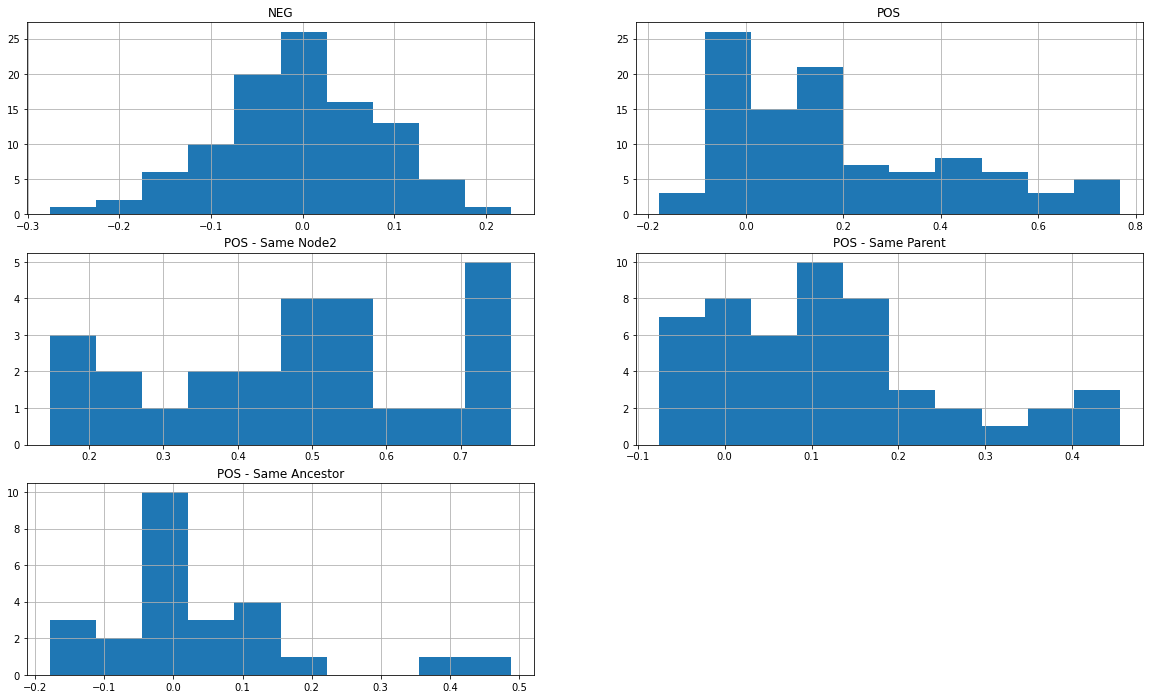

In [220]:
plot_hist_distributions(trainingDF_cosSimed_glove)

72.0


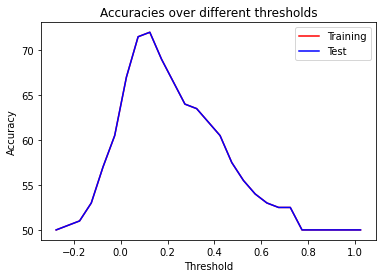

In [221]:
train_and_generate_curves(trainingDF_cosSimed_glove)

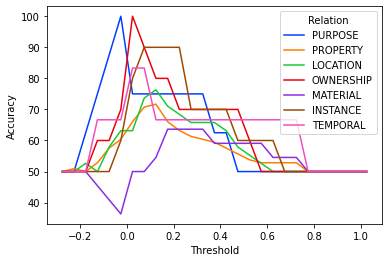

In [222]:
train_and_generate_rel_based_acc_curves(trainingDF_cosSimed_glove)

In [223]:
supervised_train_and_compute_acc(trainingDF_cosSimed_glove)

74.0

Extracted 234 embeddings
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 234 samples in 0.000s...
[t-SNE] Computed neighbors for 234 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 234 / 234
[t-SNE] Mean sigma: 1.935393
[t-SNE] KL divergence after 250 iterations with early exaggeration: 124.982422
[t-SNE] KL divergence after 1000 iterations: 1.889792


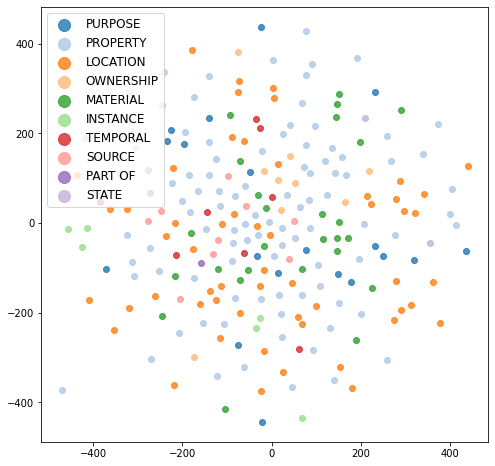

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 234 samples in 0.001s...
[t-SNE] Computed neighbors for 234 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 234 / 234
[t-SNE] Mean sigma: 1.935393
[t-SNE] KL divergence after 250 iterations with early exaggeration: 184.550507
[t-SNE] KL divergence after 1000 iterations: 3.450617


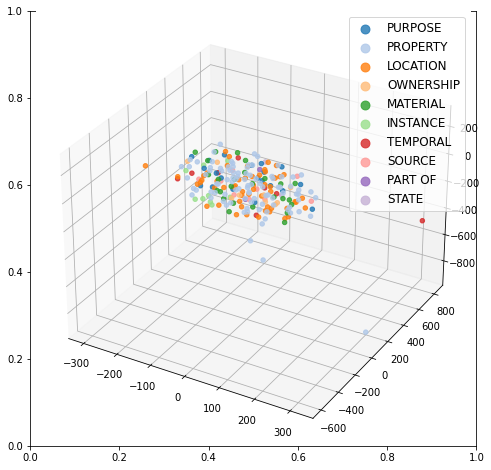

In [224]:
analyse_tsne_clusters(trainingDF_cosSimed_glove)

In [225]:
trainingDF_cosSimed_glove.columns

Index(['node1', 'node2', 'node1_label', 'node2_label', 'relation',
       'other_node1', 'other_node2', 'other_node1_label', 'other_node2_label',
       'other_relation', 'type', 'Verified', 'node1_desc', 'node2_desc',
       'other_node1_desc', 'other_node2_desc', 'comment', 'par_node',
       'par_label', 'pair1_ancestor', 'pair2_ancestor', 'top_pars_list',
       'Unnamed: 22', 'cosSim', 'diffArr1', 'childLen1', 'parLen1', 'diffArr2',
       'childLen2', 'parLen2', 'target'],
      dtype='object')

Train, Val accuracies for yes/no target ([0.99], [0.48500000000000004])


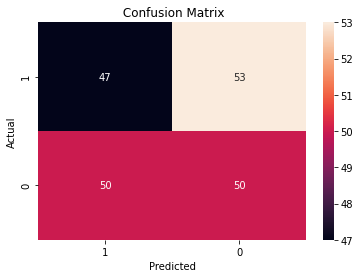

In [240]:
print("Train, Val accuracies for yes/no target", train_embed_analogy_svc(trainingDF_cosSimed_glove, 'target', 300))

In [241]:
trainingDF_cosSimed_glove[:100].relation.value_counts()

PROPERTY     53
LOCATION     19
MATERIAL     11
INSTANCE      5
OWNERSHIP     5
PURPOSE       4
TEMPORAL      3
Name: relation, dtype: int64

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Train, Val accuracies for relation ([0.9911111111111112], [0.71])


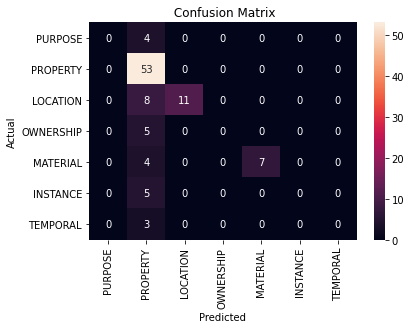

In [244]:
print("Train, Val accuracies for relation", train_embed_analogy_svc(trainingDF_cosSimed_glove[:100], 'relation', 300))

In [245]:
generate_google_proj_files(trainingDF_cosSimed_glove, 'glove')

Extracted 234 embeddings
Saved emb file: ../data/analogical_proj/emb_files_for_google_projections/glove.emb.Nov_22_2021.tsv
Saved labels file: ../data/analogical_proj/emb_files_for_google_projections/glove.lab.Nov_22_2021.tsv


## W2vec analysis

In [246]:
trainingDF_cosSimed_w2vec = trainingDF.join(get_results(trainingDF, model_w2v))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [247]:
trainingDF_cosSimed_w2vec[trainingDF_cosSimed_w2vec.cosSim == 0]

,node1,node2,node1_label,node2_label,relation,other_node1,other_node2,other_node1_label,other_node2_label,other_relation,...,pair2_ancestor,top_pars_list,Unnamed: 22,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2
48,Q605175,Q2352616,astronomical catalog,catalogue,PROPERTY,Q5707594,Q191067,news article,article,PROPERTY,...,NaN,NaN,NaN,0.0,None,2,0,"[-0.16503906, 0.06237793, 0.07910156, -0.11938...",2,1
50,Q483654,Q432,Sunni Islam,Islam,INSTANCE,Q17055687,Q9598,Yao Taoism,Taoism,INSTANCE,...,NaN,NaN,NaN,0.0,"[-0.049560547, 0.024414062, -0.13476562, -0.14...",2,1,None,1,0
60,Q6046150,Q170321,interdunal wetland,wetland,LOCATION,Q23442,Q205895,island,landmass,LOCATION,...,NaN,NaN,NaN,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,"[-0.080078125, 0.23852539, -0.41601562, 0.1105...",1,1
76,Q7991,Q336,natural science,science,PROPERTY,Q1140700,Q11635,improvisational theatre,theatre,PROPERTY,...,Q11635:theater|Q184485:performing arts|Q201852...,"entity,object,abstract object","entity,object,abstract object,structure",0.0,"[0.010925293, 0.03930664, -0.24316406, -0.0341...",2,1,None,1,0
78,Q9192,Q7850,Mandarin Chinese,Chinese,LOCATION,Q1122452,Q29536,Germanic paganism,paganism,LOCATION,...,Q29536:paganism|Q9174:religion|Q3702971:person...,"entity,object,abstract object,property","entity,object,abstract object,structure,proper...",0.0,"[0.12025452, -0.019439697, -0.12634277, 0.0029...",2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1
88,Q6786,Q6718,bottom quark,quark,PROPERTY,Q55511397,Q107968,monoatomic anion,anion,PROPERTY,...,Q107968:anion|Q36496:ion|Q2393187:molecular en...,"entity,object,physical object,particle","entity,object,physical object,particle",0.0,"[0.04345703, -0.008056641, -0.29418945, 0.0822...",2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1
110,Q1045756,Q638,microtonal music,music,PROPERTY,Q8001361,Q241741,wildlife of Botswana,wildlife,LOCATION,...,NaN,NaN,NaN,0.0,"[0.12023926, 0.06713867, 0.06262207, 0.0059814...",2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1
130,Q1587903,Q336,human science,science,PROPERTY,Q12208528,Q7188,Government of Algeria,government,LOCATION,...,NaN,NaN,NaN,0.0,"[0.0234375, -0.0146484375, -0.14526367, 0.0346...",2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1
137,Q5860,Q161,carbon fibers,fiber,MATERIAL,Q26227893,Q36192,childlore,folklore,PROPERTY,...,NaN,NaN,NaN,0.0,"[0.23703003, 0.07183838, 0.091552734, -0.00207...",2,1,None,0,1
148,Q605175,Q2352616,astronomical catalog,catalogue,PROPERTY,Q583355,Q1071,geography of North America,geography,LOCATION,...,NaN,NaN,NaN,0.0,None,2,0,"[-0.16617839, -0.049184162, -0.014241537, -0.0...",3,1


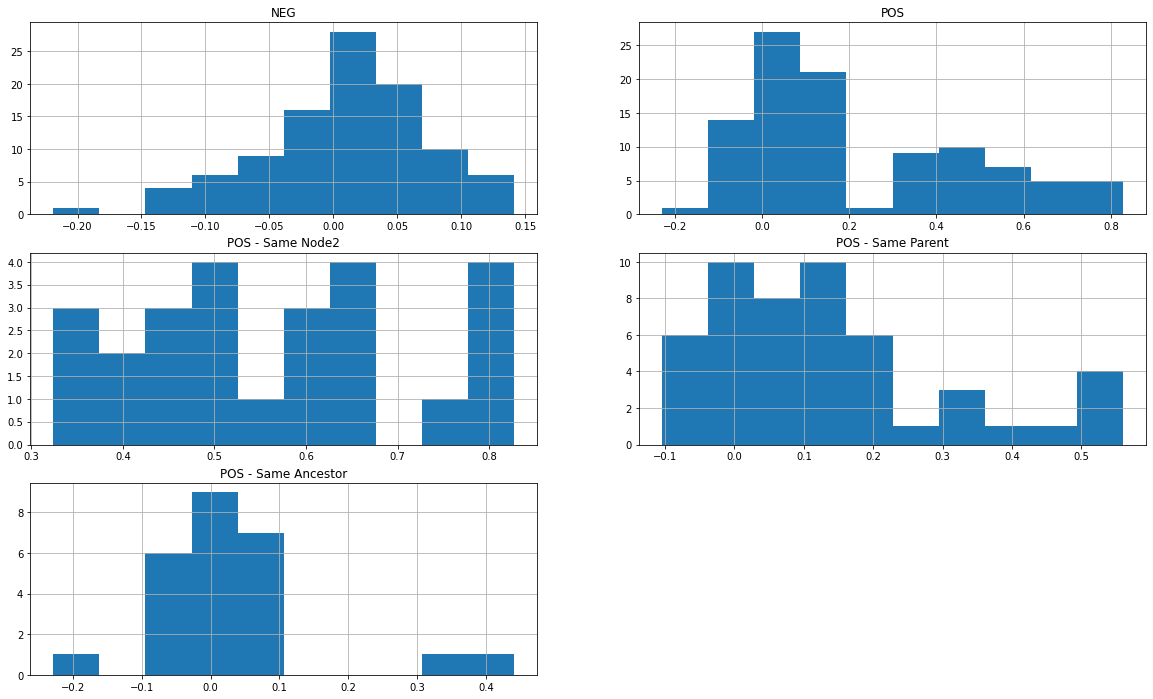

In [248]:
plot_hist_distributions(trainingDF_cosSimed_w2vec)

74.00000000000001


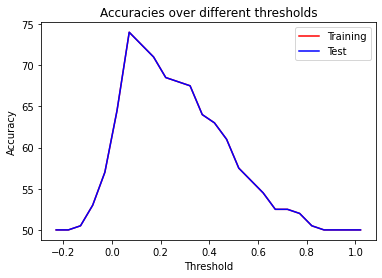

In [249]:
train_and_generate_curves(trainingDF_cosSimed_w2vec)

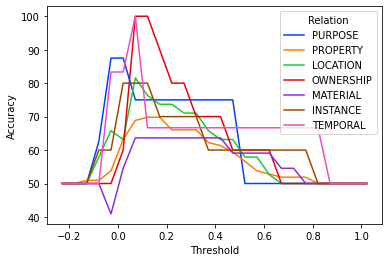

In [250]:
train_and_generate_rel_based_acc_curves(trainingDF_cosSimed_w2vec)

In [251]:
supervised_train_and_compute_acc(trainingDF_cosSimed_w2vec)

72.0

Extracted 234 embeddings
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 234 samples in 0.000s...
[t-SNE] Computed neighbors for 234 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 234 / 234
[t-SNE] Mean sigma: 0.896764
[t-SNE] KL divergence after 250 iterations with early exaggeration: 137.975464
[t-SNE] KL divergence after 1000 iterations: 2.340683


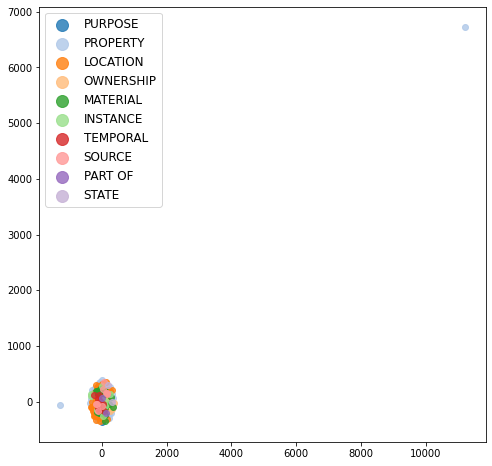

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 234 samples in 0.000s...
[t-SNE] Computed neighbors for 234 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 234 / 234
[t-SNE] Mean sigma: 0.896764
[t-SNE] KL divergence after 250 iterations with early exaggeration: 192.596817
[t-SNE] KL divergence after 1000 iterations: 3.171241


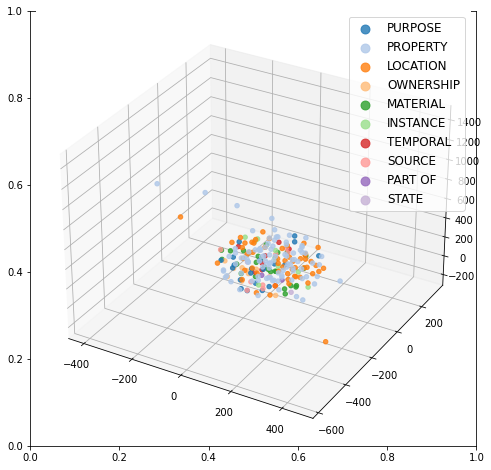

In [252]:
analyse_tsne_clusters(trainingDF_cosSimed_w2vec)

Train, Val accuracies for yes/no target ([0.971111111111111], [0.45499999999999996])


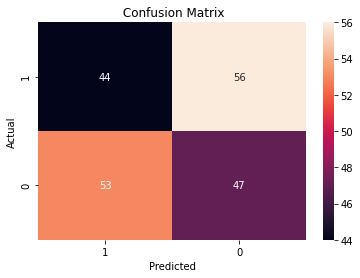

In [253]:
print("Train, Val accuracies for yes/no target", train_embed_analogy_svc(trainingDF_cosSimed_w2vec, 'target', 300))

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Train, Val accuracies for relation ([0.9766666666666666], [0.69])


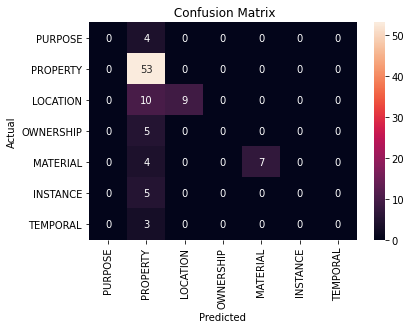

In [254]:
print("Train, Val accuracies for relation", train_embed_analogy_svc(trainingDF_cosSimed_w2vec[:100], 'relation', 300))

In [255]:
generate_google_proj_files(trainingDF_cosSimed_w2vec, 'w2vec')

Extracted 234 embeddings
Saved emb file: ../data/analogical_proj/emb_files_for_google_projections/w2vec.emb.Nov_22_2021.tsv
Saved labels file: ../data/analogical_proj/emb_files_for_google_projections/w2vec.lab.Nov_22_2021.tsv


## BERT analysis

In [256]:
import re
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from time import time
import pandas as pd
import requests

def get_bert_based_cosSim(trainingDF, modelName, structure_index):
    def fetchDescription(qnode):
        try:
            return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['descriptions']['en'][0]
        except:
            return str(False)
    def fetch_label(qnode):
        try:
            return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['labels']['en'][0]
        except:
            return str(False)
    
    def getSentEmbeddings(valSeries, modelName):
        model = SentenceTransformer(modelName)
        start = time()
        encodings = model.encode(valSeries)
        return encodings

    rows = []
    for _,row in tqdm(trainingDF.iterrows()):
        if structure_index == 1: 
            # node1_label node1_desc is related to node2_label node2_desc
            row['pair1_desc'] = fetch_label(row['node1']) + ' ' + fetchDescription(row['node1']) + \
                                ' is related to ' + fetch_label(row['node2']) + ' ' + fetchDescription(row['node2'])
            row['pair2_desc'] = fetch_label(row['other_node1']) + ' ' + fetchDescription(row['other_node1']) + \
                                ' is related to ' + fetch_label(row['other_node2']) + ' ' + fetchDescription(row['other_node2'])
        elif structure_index == 2:
            # node1_label is node1_desc
            row['pair1_desc'] = fetch_label(row['node1']) + ' is ' + fetchDescription(row['node1'])
            row['pair2_desc'] = fetch_label(row['other_node1']) + ' is ' + fetchDescription(row['other_node1'])
        elif structure_index == 3:
            # node1_label is related to node2_label
            row['pair1_desc'] = fetch_label(row['node1']) + \
                                ' is related to ' + fetch_label(row['node2'])
            row['pair2_desc'] = fetch_label(row['other_node1']) + \
                                ' is related to ' + fetch_label(row['other_node2'])
        rows.append(row)
    analogicalDF = pd.DataFrame(rows)
    analogicalDF['pair1_emb'] = pd.Series(list(getSentEmbeddings(analogicalDF['pair1_desc'], modelName)))
    analogicalDF['pair2_emb'] = pd.Series(list(getSentEmbeddings(analogicalDF['pair2_desc'], modelName)))
    analogicalDF['cosSim'] = analogicalDF.apply(lambda p: cosine_similarity(np.array(p['pair1_emb']).reshape(1,-1),np.array(p['pair2_emb']).reshape(1,-1))[0][0], axis=1)
    return analogicalDF

def get_bert_based_pairwise_cosSim(trainingDF, modelName, structure_index):
    def fetchDescription(qnode):
        try:
            return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['descriptions']['en'][0]
        except:
            return str(False)
    def fetch_label(qnode):
        try:
            return requests.get('http://ckg07:9200/wikidatadwd-augmented/_doc/'+qnode).json()['_source']['labels']['en'][0]
        except:
            return str(False)
    
    def getSentEmbeddings(valSeries, modelName):
        model = SentenceTransformer(modelName)
        start = time()
        encodings = model.encode(valSeries)
        return encodings

    rows = []
    for _,row in tqdm(trainingDF.iterrows()):
        if structure_index == 4: 
            # node1_label node1_desc is related to node2_label node2_desc
            row['node1_desc_1'] = fetch_label(row['node1']) + ' ' + fetchDescription(row['node1'])
            row['node2_desc_1'] = fetch_label(row['node2']) + ' ' + fetchDescription(row['node2'])
            
            row['other_node1_desc_1'] = fetch_label(row['other_node1']) + ' ' + fetchDescription(row['other_node1'])
            row['other_node2_desc_1'] = fetch_label(row['other_node2']) + ' ' + fetchDescription(row['other_node2'])
            
        rows.append(row)
    analogicalDF = pd.DataFrame(rows)
    analogicalDF['node1_desc_1'] = pd.Series(list(getSentEmbeddings(analogicalDF['node1_desc_1'], modelName)))
    analogicalDF['node2_desc_1'] = pd.Series(list(getSentEmbeddings(analogicalDF['node2_desc_1'], modelName)))
    
    analogicalDF['other_node1_desc_1'] = pd.Series(list(getSentEmbeddings(analogicalDF['other_node1_desc_1'], modelName)))
    analogicalDF['other_node2_desc_1'] = pd.Series(list(getSentEmbeddings(analogicalDF['other_node2_desc_1'], modelName)))
    
    analogicalDF['cosSim'] = analogicalDF.apply(lambda p: cosine_similarity(
                    np.array(p['node1_desc_1']).reshape(1,-1) - np.array(p['node2_desc_1']).reshape(1,-1),
                    np.array(p['other_node1_desc_1']).reshape(1,-1) - np.array(p['other_node2_desc_1']).reshape(1,-1)
                )[0][0], axis=1)
    return analogicalDF


### node1_label is node1_desc

In [257]:
trainingDF_cosSimed_bert = get_bert_based_cosSim(trainingDF, 'sentence-transformers/all-distilroberta-v1', 2)

0it [00:00, ?it/s]

Exception when trying to download https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip not found. Try to create it from scratch
Try to create Transformer Model sentence-transformers/all-distilroberta-v1 with mean pooling
Exception when trying to download https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip not found. Try to create it from scratch
Try to create Transformer Model sentence-transformers/all-distilroberta-v1 with mean pooling


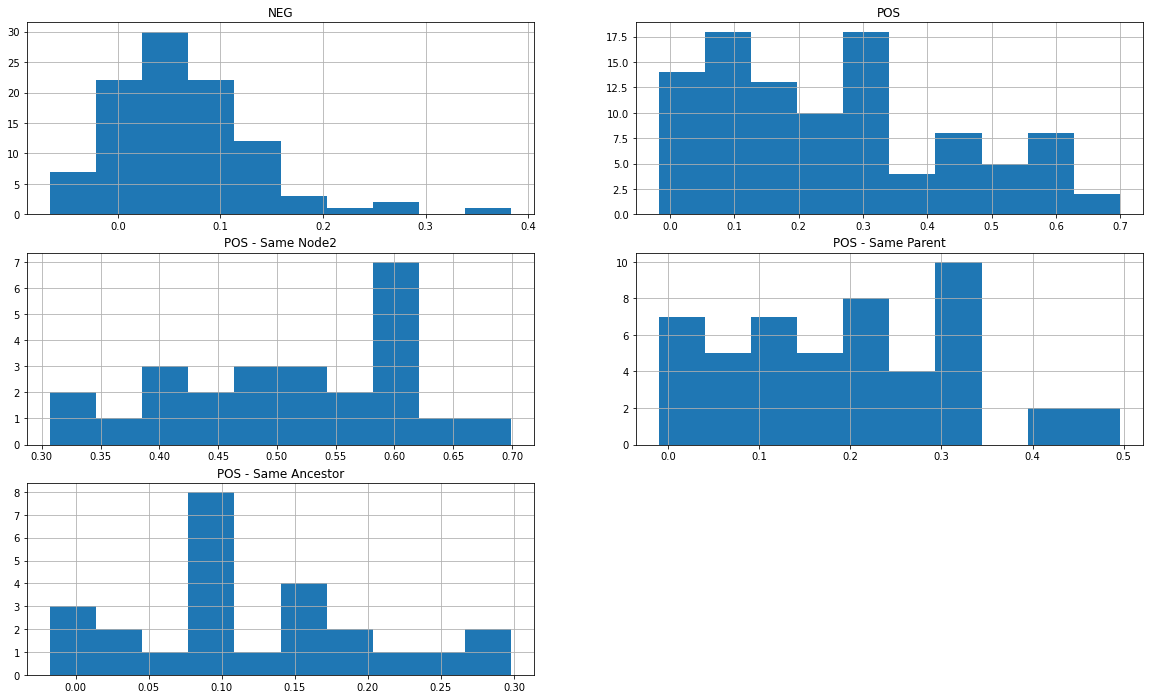

In [258]:
plot_hist_distributions(trainingDF_cosSimed_bert)

77.5


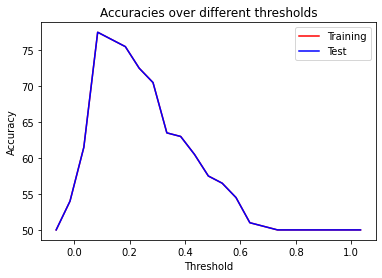

In [259]:
train_and_generate_curves(trainingDF_cosSimed_bert)

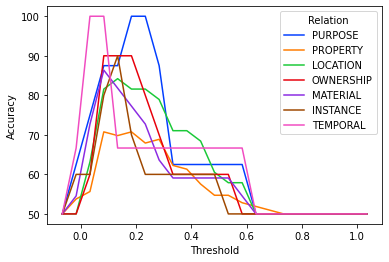

In [260]:
train_and_generate_rel_based_acc_curves(trainingDF_cosSimed_bert)

In [261]:
supervised_train_and_compute_acc(trainingDF_cosSimed_bert)

76.0

### node1_label node1_desc is related to node2_label node2_desc

In [262]:
trainingDF_cosSimed_bert = get_bert_based_cosSim(trainingDF, 'sentence-transformers/all-distilroberta-v1', 1)

0it [00:00, ?it/s]

Exception when trying to download https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip not found. Try to create it from scratch
Try to create Transformer Model sentence-transformers/all-distilroberta-v1 with mean pooling
Exception when trying to download https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip not found. Try to create it from scratch
Try to create Transformer Model sentence-transformers/all-distilroberta-v1 with mean pooling


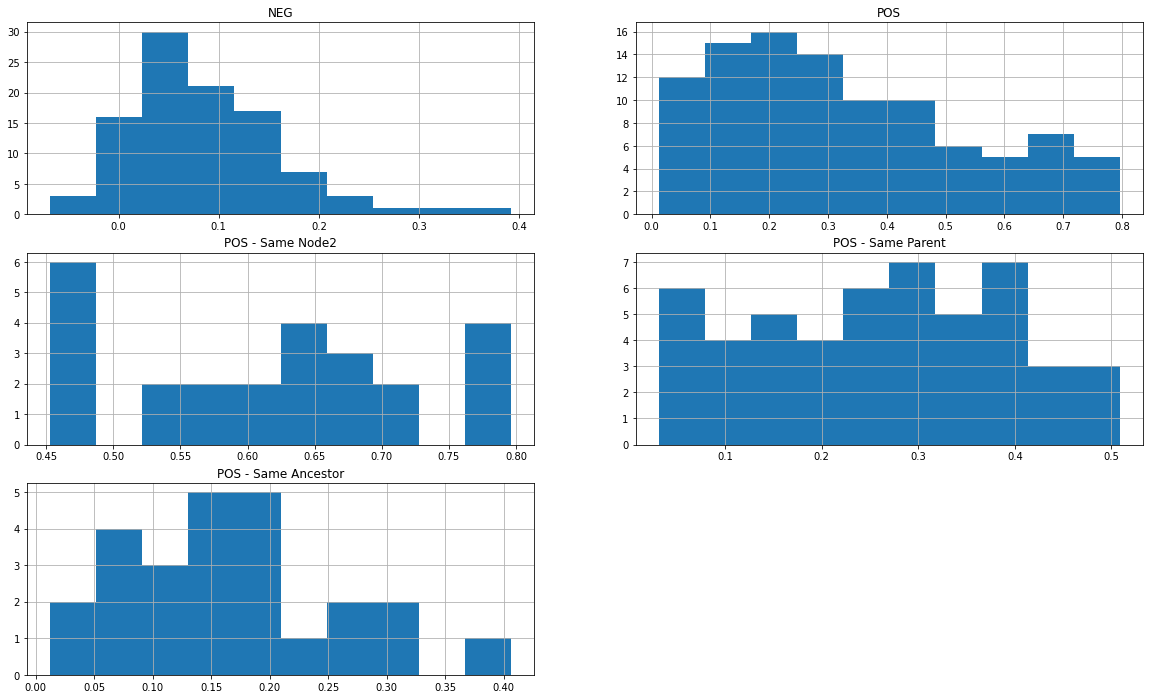

In [263]:
plot_hist_distributions(trainingDF_cosSimed_bert)

81.49999999999999


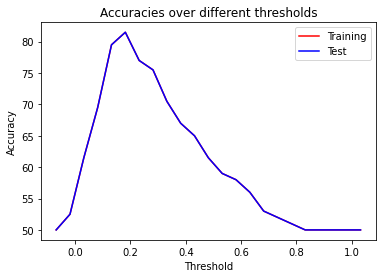

In [264]:
train_and_generate_curves(trainingDF_cosSimed_bert)

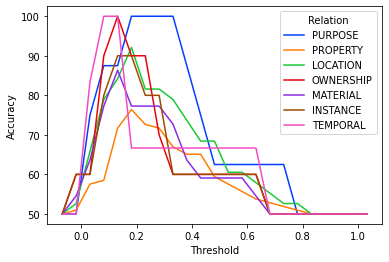

In [265]:
train_and_generate_rel_based_acc_curves(trainingDF_cosSimed_bert)

In [266]:
supervised_train_and_compute_acc(trainingDF_cosSimed_bert)

79.0

In [267]:
trainingDF_cosSimed_bert[:100].relation.value_counts()

PROPERTY     53
LOCATION     19
MATERIAL     11
INSTANCE      5
OWNERSHIP     5
PURPOSE       4
TEMPORAL      3
Name: relation, dtype: int64

In [268]:
trainingDF_cosSimed_bert['diffArr1'] = trainingDF_cosSimed_bert['pair1_emb']
trainingDF_cosSimed_bert['diffArr2'] = trainingDF_cosSimed_bert['pair2_emb']

In [269]:
trainingDF_cosSimed_bert.columns

Index(['node1', 'node2', 'node1_label', 'node2_label', 'relation',
       'other_node1', 'other_node2', 'other_node1_label', 'other_node2_label',
       'other_relation', 'type', 'Verified', 'node1_desc', 'node2_desc',
       'other_node1_desc', 'other_node2_desc', 'comment', 'par_node',
       'par_label', 'pair1_ancestor', 'pair2_ancestor', 'top_pars_list',
       'Unnamed: 22', 'pair1_desc', 'pair2_desc', 'pair1_emb', 'pair2_emb',
       'cosSim', 'target', 'diffArr1', 'diffArr2'],
      dtype='object')

Extracted 234 embeddings
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 234 samples in 0.000s...
[t-SNE] Computed neighbors for 234 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 234 / 234
[t-SNE] Mean sigma: 3.780096
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.023659
[t-SNE] KL divergence after 1000 iterations: 0.804325


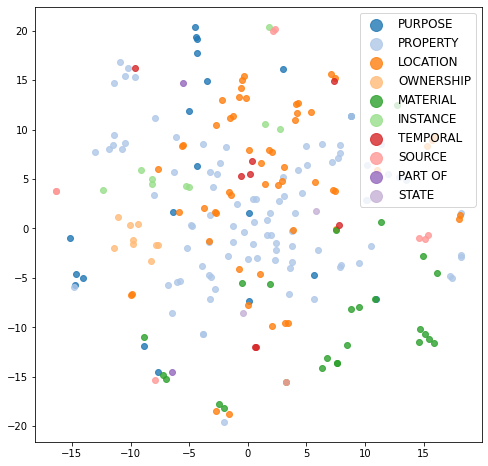

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 234 samples in 0.000s...
[t-SNE] Computed neighbors for 234 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 234 / 234
[t-SNE] Mean sigma: 3.780096
[t-SNE] KL divergence after 250 iterations with early exaggeration: 153.050140
[t-SNE] KL divergence after 1000 iterations: 2.205989


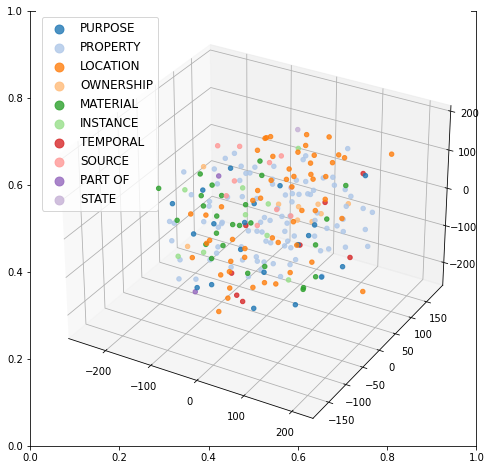

In [270]:
analyse_tsne_clusters(trainingDF_cosSimed_bert)

Train, Val accuracies for yes/no target ([0.9994444444444444], [0.535])


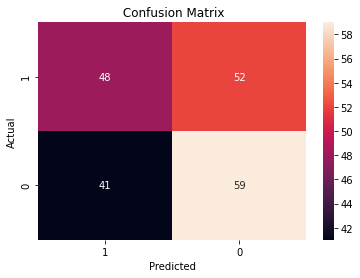

In [271]:
print("Train, Val accuracies for yes/no target", train_embed_analogy_svc(trainingDF_cosSimed_bert, 'target', 300))

In [ ]:
print("Train, Val accuracies for relation", train_embed_analogy_svc(trainingDF_cosSimed_bert[:100], 'relation'))

In [ ]:
generate_google_proj_files(trainingDF_cosSimed_bert, 'bert_v2')

### node1_label is related to node2_label

In [ ]:
trainingDF_cosSimed_bert = get_bert_based_cosSim(trainingDF, 'sentence-transformers/all-distilroberta-v1', 3)

In [ ]:
plot_hist_distributions(trainingDF_cosSimed_bert)

In [ ]:
train_and_generate_curves(trainingDF_cosSimed_bert)

In [ ]:
train_and_generate_rel_based_acc_curves(trainingDF_cosSimed_bert)

In [ ]:
supervised_train_and_compute_acc(trainingDF_cosSimed_bert)

### node1_label - node2_label

In [ ]:
trainingDF_cosSimed_bert = get_bert_based_pairwise_cosSim(trainingDF, 'sentence-transformers/all-distilroberta-v1', 4)

In [ ]:
plot_hist_distributions(trainingDF_cosSimed_bert)

In [ ]:
train_and_generate_curves(trainingDF_cosSimed_bert)

In [ ]:
train_and_generate_rel_based_acc_curves(trainingDF_cosSimed_bert)

In [ ]:
supervised_train_and_compute_acc(trainingDF_cosSimed_bert)

In [ ]:
get_relwise_acc(trainingDF_cosSimed_w2vec, 0.1).join(get_relwise_acc(trainingDF_cosSimed_bert, 0.1), rsuffix='_bert')

In [ ]:
get_typewise_acc(trainingDF_cosSimed_w2vec, 0.1).join(get_typewise_acc(trainingDF_cosSimed_bert, 0.1), rsuffix='_bert')

In [ ]:
get_overall_acc(trainingDF_cosSimed_w2vec, 0.1),  get_overall_acc(trainingDF_cosSimed_bert, 0.1)

# SemEval 2012 Dataset

In [10]:
from itertools import combinations, product
from string import ascii_lowercase
import os

dataset = []

for num, alpha in product(range(1,11), ascii_lowercase):
    num = str(num)
    
    if not(os.path.exists(SEM_EVAL_FILEPATH + '/Testing/Phase1Questions/' + 'Phase1Questions-' + num + alpha + '.txt')) or \
        not(os.path.exists(SEM_EVAL_FILEPATH + '/Testing/Phase1Answers/' + 'Phase1Answers-' + num + alpha + '.txt')):
        continue
    try:
        with open(SEM_EVAL_FILEPATH + '/Testing/Phase1Questions/' + 'Phase1Questions-' + num + alpha + '.txt') as sem_eval_f:
            lines = sem_eval_f.readlines()
            line1 = lines[0].strip().split()
            file_id, class_relation, relation = line1[1], line1[2][:-1], line1[3]
            line_num = 0
            for i, line in enumerate(lines):
                if "What relation best describes" in line:
                    line_num = i
                    break
            examples = []
            for line in lines[4:line_num-1]:
                for pair in line.strip().split('.'):
                    examples.append([pair_elem.strip() for pair_elem in pair.split(':')])
#             examples = [[pair_elem for pair_elem in pair.strip().split(':')] for pair in lines[4:7]]
            for i, line in enumerate(lines):
                if "Correct Answer" in line:
                    line_num = i + 2
                    break
            explanation = lines[line_num].strip()
        #     print(line1, examples, explanation)
#         with open(SEM_EVAL_FILEPATH + '/Testing/Phase1Answers/' + 'Phase1Answers-' + num + alpha + '.txt') as sem_eval_f:
#             lines = sem_eval_f.readlines()
#             answer_pairs = []
#             for line in lines:
#                 answer_pairs.append([pair_elem for pair_elem in line.strip()[1:-1].split(':')])
        #     print(answer_pairs)
        for pair1, pair2 in combinations(examples,2):
            dataset.append([pair1[0], pair1[1], class_relation, relation, pair2[0], pair2[1], file_id, explanation])
#         print(dataset)
    except Exception as err:
        print(SEM_EVAL_FILEPATH + '/Testing/Phase1Questions/' + 'Phase1Questions-' + num + alpha + '.txt')
        print(SEM_EVAL_FILEPATH + '/Testing/Phase1Answers/' + 'Phase1Answers-' + num + alpha + '.txt')
        raise(err)

In [13]:
sem_eval_df = pd.DataFrame(dataset, columns=['node1', 'node2', 'class', 'relation', 'other_node1', 'other_node2', 'file_id', 'explanation'])

In [14]:
sem_eval_df = sem_eval_df.rename(columns={'node1': 'node1_label', 'node2': 'node2_label', 'node1_qnode': 'node1', 'node2_qnode': 'node2', 'other_node1': 'other_node1_label', 'other_node2': 'other_node2_label', 'other_node1_qnode': 'other_node1', 'other_node2_qnode': 'other_node2', 'relation': 'subrelation', 'class': 'relation'})

In [15]:
sem_eval_df['other_relation'] = sem_eval_df['relation']

In [16]:
sem_eval_df.to_csv(SEM_EVAL_GENERATED_FILE, index=None)
len(sem_eval_df)

234

In [17]:
sem_eval_df = pd.read_csv(SEM_EVAL_GENERATED_FILE)

## Map to Nodes

In [20]:
def fetch_labels_to_qnodes_dict():
    labels_to_qnodes_dict = defaultdict(str)
    with gzip.open(LABELS_FILE) as lab_f:
        first_line = True
        for line in tqdm(lab_f, total=41845781):
            if first_line:
                first_line = False
                continue
            line = line.decode('utf-8').strip().split()
            str1 = line[3][1:-4]
            qnode = line[1]
            if qnode.startswith('Q'):
                if str1 in labels_to_qnodes_dict:
                    if qnode < labels_to_qnodes_dict[str1]:
                        labels_to_qnodes_dict[str1] = qnode
                else:
                    labels_to_qnodes_dict[str1] = qnode
    return labels_to_qnodes_dict
labels_to_qnodes_dict = fetch_labels_to_qnodes_dict()

  0%|          | 0/41845781 [00:00<?, ?it/s]

In [21]:
len(labels_to_qnodes_dict)

5853870

In [22]:
# Corrections
corrections_dict = {
    'forrest': 'forest'
}
sem_eval_df['node1_label'] = sem_eval_df.node1_label.apply(lambda p: corrections_dict[p] if p in corrections_dict else p)
sem_eval_df['node2_label'] = sem_eval_df.node2_label.apply(lambda p: corrections_dict[p] if p in corrections_dict else p)
sem_eval_df['other_node1_label'] = sem_eval_df.other_node1_label.apply(lambda p: corrections_dict[p] if p in corrections_dict else p)
sem_eval_df['other_node2_label'] = sem_eval_df.other_node2_label.apply(lambda p: corrections_dict[p] if p in corrections_dict else p)

In [126]:
fix_labels_to_qnodes_dict = {
    'crescendo': 'Q2347888',
    'fight': 'Q650711', # combat
    'kickoff': 'Q10545289',
    'dishes': 'Q746549',
    'plagiarize': 'Q164666',
    'groceries': 'Q951964', # grocery,
    'destroy': 'Q17781833',
    'inexperience': 'Q108816154',
    'bequeath': 'Q211557',
    'minds': 'Q450',
    'hurry': 'Q17598913',
    'passionate': 'Q335046',
    'bookshelf': 'Q215857',
    'comforted': 'Q1367353',
    'sandwiches': 'Q28803',
    'textbooks': 'Q83790',
    'gullibility': 'Q10841408',
    'austere': 'Q2814650',
    'projectiles': 'Q49393',
    'potable': 'Q7892',
    'infectious': 'Q18123741',
    'calculate': 'Q622821',
    'saucers': 'Q1422576',
    'graduate': 'Q508719',
    'movie': 'Q11424',
    'apostate': 'Q223681',
    'malleable': 'Q34669510',
    'infancy': 'Q49257364',
    'buying': 'Q1369832',
    'contaminate': 'Q60528603',
    'destitute': 'Q2714378',
    'numbness': 'Q1641556',
    'simmer': 'Q240164',
    'moist': 'Q217651',
    'reticent': 'Q24238091',
    'brave': 'Q208160',
    'molded': 'Q1770806',
    'criticized': 'Q17955',
    'celibate': 'Q191778',
    'vigilant': 'Q1418914',
    'trackpad': 'Q20137',
    'discount': 'Q1047056',
    'eavesdrop': 'Q320769',
    'deny': 'Q100268981',
    'socialize': 'Q185467',
    'exemplary': 'Q1383678',
    'sterilize': 'Q191618',
    'bulwark': 'Q81851',
    'gently': 'Q5533755',
    'brighten': 'Q221656',
    'scream': 'Q1932016',
    'eaten': 'Q213449',
    'protege': 'Q17138417',
    'puzzlement': 'Q557945',
    'embellish': 'Q5370025',
    'immortal': 'Q193942',
    'lubricate': 'Q1455803',
    'edible': 'Q2095',
    'obliterate': 'Q17781833',
    'lateness': 'Q25339847',
    'young': 'Q190007',
    'indulge': 'Q44777',
    'crush': 'Q4388656',
    'remember': 'Q492',
    'morbid': 'Q65169293',
    'comprehend': 'Q46744',
    'vigorous': 'Q56037291',
    'popular': 'Q1357284',
    'careless': 'Q691101',
    'disparage': 'Q5282527',
    'juggernaut': 'Q145660',
    'fertilize': 'Q83323',
    'enigma': 'Q47054',
    'extant': 'Q468777',
    'viable': 'Q624501',
    'rich': 'Q106804044',
    'inception': 'P571',    # Q3406134
    'listener': 'Q6646450',
    'discordant': 'Q104813442',
    'mend': 'Q2144962',
    'tiny': 'Q24245823',
    'lushness': 'Q336019',
    'abruptly': 'P1478',
    'plenitude': 'Q336019',
    'quietly': 'Q502261',
    'live': 'Q3',
    'alive': 'Q3',
    'garbled': 'Q1347355',
    'leer': 'Q600717',
    'fast': 'Q3711325',
    'vista': 'Q107425',
    'broken': 'Q5120022',
    'elusive': 'Q50388354',
    'obtrusive': 'Q19357896',
    'flimsy': 'Q898288',
    'refreshments': 'Q749316',
    'satiation flee': 'Q1350299',
    'inconsolable': 'Q1369657',
    
}

In [127]:
sem_eval_df['node1'] = sem_eval_df.node1_label.apply(lambda p: labels_to_qnodes_dict[p] if p in labels_to_qnodes_dict else fix_labels_to_qnodes_dict[p] if p in fix_labels_to_qnodes_dict else None)
sem_eval_df['node2'] = sem_eval_df.node2_label.apply(lambda p: labels_to_qnodes_dict[p] if p in labels_to_qnodes_dict else fix_labels_to_qnodes_dict[p] if p in fix_labels_to_qnodes_dict else None)
sem_eval_df['other_node1'] = sem_eval_df.other_node1_label.apply(lambda p: labels_to_qnodes_dict[p] if p in labels_to_qnodes_dict else fix_labels_to_qnodes_dict[p] if p in fix_labels_to_qnodes_dict else None)
sem_eval_df['other_node2'] = sem_eval_df.other_node2_label.apply(lambda p: labels_to_qnodes_dict[p] if p in labels_to_qnodes_dict else fix_labels_to_qnodes_dict[p] if p in fix_labels_to_qnodes_dict else None)

In [128]:
word = 'break'
sem_eval_df[(sem_eval_df.other_node2_label == word) | (sem_eval_df.other_node1_label == word) | (sem_eval_df.node2_label == word) | (sem_eval_df.node1_label == word)]

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2
94,glass,break,ATTRIBUTE,Object:Typical,soldier,fight,5(e),an X will typically Y,ATTRIBUTE,Q11469,Q1267190,Q11950096,Q650711
95,glass,break,ATTRIBUTE,Object:Typical,juggernaut,crush,5(e),an X will typically Y,ATTRIBUTE,Q11469,Q1267190,Q145660,Q4388656
98,viable,live,ATTRIBUTE,Agent/ObjectAttribute:Typical,brittle,break,5(f),something/someone that is X will typically Y,ATTRIBUTE,Q624501,Q3,Q708823,Q1267190
99,salient,notice,ATTRIBUTE,Agent/ObjectAttribute:Typical,brittle,break,5(f),something/someone that is X will typically Y,ATTRIBUTE,Q56882493,Q7063001,Q708823,Q1267190


In [277]:
len(sem_eval_df)

234

In [129]:
node_labels_of_interest = set(sem_eval_df['node1_label'].to_list() + \
                sem_eval_df['node2_label'].to_list() + \
                sem_eval_df['other_node1_label'].to_list() + \
                sem_eval_df['other_node2_label'].to_list())
missing_qnodes = []
for node_label in node_labels_of_interest:
    if node_label not in labels_to_qnodes_dict and node_label not in fix_labels_to_qnodes_dict:
        missing_qnodes.append(node_label)
missing_qnodes

['inaudible']

In [130]:
import requests
def fetch_matches(qnode_label):
    try:
        return requests.get('https://ringgaard.com/kb/query?fmt=cjson&q='+qnode_label).json()['matches']
    except:
        return str(False)

In [131]:
missing_qnode_suggestions = list(zip(missing_qnodes, [list(filter(lambda p: p['text'][0].islower(), fetch_matches(text))) for text in missing_qnodes]))

In [132]:
for elem in missing_qnode_suggestions:
    print(elem)

('inaudible', [{'ref': 'Q57501180', 'text': 'inaudible (2016-2017)', 'description': 'podiumkunstenproductie'}, {'ref': 'Q57511654', 'text': 'inaudible (2015-2016)', 'description': 'podiumkunstenproductie'}, {'ref': 'Q57504889', 'text': 'inaudible (2017-2018)', 'description': 'podiumkunstenproductie'}])


In [133]:
# list(filter(lambda p: p['text'][0].islower(), fetch_matches('indistinct')))

In [137]:
temp_arr = []
for node_label in node_labels_of_interest:
    if node_label not in labels_to_qnodes_dict and node_label in fix_labels_to_qnodes_dict:
        temp_arr.append([node_label, fix_labels_to_qnodes_dict[node_label], fetch_label(fix_labels_to_qnodes_dict[node_label]), fetch_desc(fix_labels_to_qnodes_dict[node_label])])
    elif node_label not in labels_to_qnodes_dict and node_label not in fix_labels_to_qnodes_dict:
        temp_arr.append([node_label, None, None, None])

In [278]:
pd.DataFrame(temp_arr, columns=['node label', 'node', 'actual label', 'actual description']).to_csv('../data/analogical_proj/TEMP_check_files/verify_SAT_mappings_Nov_23_2021.csv')

In [138]:
print(sem_eval_df.node1.isna().sum(), \
    sem_eval_df.node2.isna().sum(), 
    sem_eval_df.other_node1.isna().sum(), 
    sem_eval_df.other_node2.isna().sum())

0 0 0 2


In [273]:
len(sem_eval_df)

234

In [139]:
sem_eval_df.relation.value_counts()

NON-ATTRIBUTE      37
CONTRAST           31
SPACE-TIME         30
CAS                24
PART-WHOLE         24
CAUSE-PURPOSE      22
ATTRIBUTE          21
SIMILAR            18
REFERENCE          15
CLASS-INCLUSION    12
Name: relation, dtype: int64

In [141]:
sem_eval_df.to_csv(SEM_EVAL_GENERATED_FINAL_FILE, index=None)

In [142]:
sem_eval_df.head()

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2
0,ornament,brooch,CLASS-INCLUSION,Functional,weapon,knife,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q728,Q32489
1,ornament,brooch,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q42889,Q100147763
2,weapon,knife,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q728,Q32489,Q42889,Q100147763
3,cutlery,spoon,CLASS-INCLUSION,Singular,clothing,shirt,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q11460,Q76768
4,cutlery,spoon,CLASS-INCLUSION,Singular,vermin,rat,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q1192197,Q16965317


In [152]:
sem_eval_df_og = sem_eval_df.drop(columns=['diffArr1', 'diffArr2', 'cosSim'])

In [283]:
len(sem_eval_df_og)

234

## Complex embedding analysis

In [143]:
nodes_of_interest = set(sem_eval_df['node1'].to_list() + \
                sem_eval_df['node2'].to_list() + \
                sem_eval_df['other_node1'].to_list() + \
                sem_eval_df['other_node2'].to_list())
first_line = True
complex_emb_dict = {}
with open(COMPLEX_EMB_SOURCE_FILE) as complex_file:
    for line in tqdm(complex_file,total=53002671):
        if first_line:
            first_line = False
            continue
        line = line.strip().split()
        if line[0] in nodes_of_interest:
            complex_emb_dict[line[0]] = [float(elem) for elem in line[1:]]

  0%|          | 0/53002671 [00:00<?, ?it/s]

In [144]:
len(complex_emb_dict)

371

In [274]:
missing_comp_emb = []
for node in nodes_of_interest:
    if node not in complex_emb_dict:
        missing_comp_emb.append(node)
print(missing_comp_emb)

['Q5429163', 'Q24238091', 'Q173567', 'Q11631711', 'Q10502295', 'Q105272601', 'Q19357471', 'Q1383678', 'Q10470762', 'Q1361649', None, 'Q19357896', 'Q5370025', 'Q17058142', 'Q108816154', 'Q10841408', 'Q106804044', 'Q5282527', 'Q624501', 'Q12622188', 'Q10545289']


In [146]:
sem_eval_df['diffArr1'] = sem_eval_df.apply(lambda p: np.array(complex_emb_dict[p['node1']]) - np.array(complex_emb_dict[p['node2']]) if p['node1'] in complex_emb_dict and p['node2'] in complex_emb_dict else None, axis=1)
sem_eval_df['diffArr2'] = sem_eval_df.apply(lambda p: np.array(complex_emb_dict[p['other_node1']]) - np.array(complex_emb_dict[p['other_node2']]) if p['other_node1'] in complex_emb_dict and p['other_node2'] in complex_emb_dict else None, axis=1)
sem_eval_df['cosSim'] = sem_eval_df.apply(lambda p: cosine_similarity(p.diffArr1.reshape(1, -1), p.diffArr2.reshape(1, -1))[0][0] if p.diffArr1 is not None and p.diffArr2 is not None else 0, axis=1)

In [276]:
sem_eval_df.to_csv(SEM_EVAL_GENERATED_FINAL_COMPLEX_FILE, index=None)

## Further Analysis

In [147]:
sem_eval_df.head()

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,diffArr1,diffArr2,cosSim
0,ornament,brooch,CLASS-INCLUSION,Functional,weapon,knife,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q728,Q32489,"[-0.60044688, -0.2915966510000001, -0.68566801...","[-0.545061916, 0.4472830899999999, 0.037000953...",-0.027311
1,ornament,brooch,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q42889,Q100147763,"[-0.60044688, -0.2915966510000001, -0.68566801...","[0.895021855, 0.38843967, -0.576452642, -0.191...",0.158225
2,weapon,knife,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q728,Q32489,Q42889,Q100147763,"[-0.545061916, 0.4472830899999999, 0.037000953...","[0.895021855, 0.38843967, -0.576452642, -0.191...",0.000055
3,cutlery,spoon,CLASS-INCLUSION,Singular,clothing,shirt,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q11460,Q76768,"[-0.100445211, 0.29185074600000005, -0.4594371...","[0.211987704, 0.8644514680000001, -0.810434222...",0.105877
4,cutlery,spoon,CLASS-INCLUSION,Singular,vermin,rat,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q1192197,Q16965317,"[-0.100445211, 0.29185074600000005, -0.4594371...","[-0.09306335399999999, 0.259244382, -0.2934440...",0.268624


In [148]:
sem_eval_df.cosSim.describe()

count    234.000000
mean       0.023982
std        0.127953
min       -0.276943
25%       -0.047168
50%        0.000000
75%        0.097545
max        0.422457
Name: cosSim, dtype: float64

<AxesSubplot:>

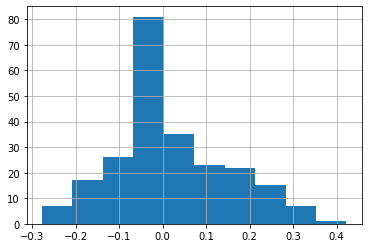

In [149]:
sem_eval_df.cosSim.hist()

In [153]:
sem_eval_df1 = sem_eval_df[sem_eval_df.apply(lambda p: not(p.diffArr1 is None or p.diffArr2 is None), axis=1)]

In [279]:
sem_eval_df_og1 = sem_eval_df_og[sem_eval_df.apply(lambda p: not(p.diffArr1 is None or p.diffArr2 is None), axis=1)].reset_index().drop(columns=['index'])

In [281]:
len(sem_eval_df_og1)

187

In [280]:
len(sem_eval_df1)

146

In [156]:
sem_eval_df[sem_eval_df.cosSim == 0]

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,diffArr1,diffArr2,cosSim
22,shopping,buying,PART-WHOLE,Activity:Stage,kickoff,football,2(e),X is one step/action/part of the actions in Y,PART-WHOLE,Q830036,Q1369832,Q10545289,Q1081491,"[0.46245562999999995, 0.08328121899999996, -0....",None,0.0
23,planting,gardening,PART-WHOLE,Activity:Stage,kickoff,football,2(e),X is one step/action/part of the actions in Y,PART-WHOLE,Q2083967,Q124946,Q10545289,Q1081491,"[0.5594522200000001, 0.11382955299999997, 0.82...",None,0.0
36,enthusiasm,fervor,SIMILAR,Dimensional,simmer,boil,3(b),an X and Y are two kinds in a category of acti...,SIMILAR,Q3726381,Q19357471,Q240164,Q193918,None,"[0.31926961600000003, 0.106857121, 0.537870318...",0.0
37,enthusiasm,fervor,SIMILAR,Dimensional,stream,river,3(b),an X and Y are two kinds in a category of acti...,SIMILAR,Q3726381,Q19357471,Q17362054,Q11241972,None,"[0.43412276800000005, 0.7315329909999999, -0.1...",0.0
60,front,back,CONTRAST,Directional,left,right,4(d),X is the opposite direction from Y,CONTRAST,Q12622188,Q104017187,Q13196750,Q14565199,None,"[0.018274266, -0.25386798300000013, 0.51898595...",0.0
61,front,back,CONTRAST,Directional,east,west,4(d),X is the opposite direction from Y,CONTRAST,Q12622188,Q104017187,Q29714957,Q27649701,None,"[0.061645791000000005, 0.255563498, 0.19968936...",0.0
62,front,back,CONTRAST,Directional,before,after,4(d),X is the opposite direction from Y,CONTRAST,Q12622188,Q104017187,Q79030196,Q104148637,None,"[-0.059352527, -0.56377396, 0.1224096720000000...",0.0
63,front,back,CONTRAST,Directional,inside,outside,4(d),X is the opposite direction from Y,CONTRAST,Q12622188,Q104017187,Q30014638,Q66563375,None,"[0.393965754, 0.07530659499999992, 0.701405078...",0.0
73,hot,cool,CONTRAST,Asymmetric,destitute,rich,4(f),X and Y are at opposite ends of the same scale,CONTRAST,Q1094821,Q10502295,Q2714378,Q106804044,None,None,0.0
74,hot,cool,CONTRAST,Asymmetric,tiny,large,4(f),X and Y are at opposite ends of the same scale,CONTRAST,Q1094821,Q10502295,Q24245823,Q59863338,None,"[-0.169560127, -0.31372964400000003, 0.3675643...",0.0


In [157]:
sem_eval_df[sem_eval_df.cosSim > 0.5]

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,diffArr1,diffArr2,cosSim


Extracted 215 embeddings
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 215 samples in 0.000s...
[t-SNE] Computed neighbors for 215 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 215 / 215
[t-SNE] Mean sigma: 1.407808
[t-SNE] KL divergence after 250 iterations with early exaggeration: 133.461990
[t-SNE] KL divergence after 1000 iterations: 1.563791


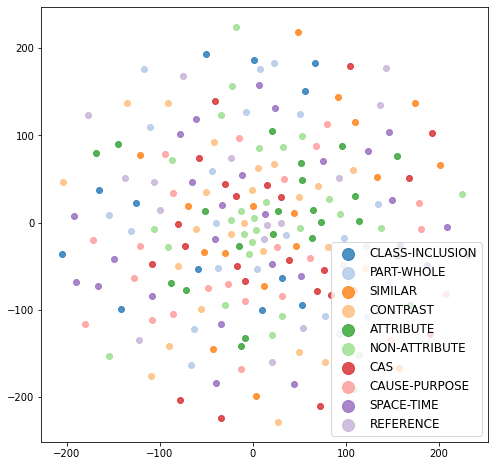

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 215 samples in 0.000s...
[t-SNE] Computed neighbors for 215 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 215 / 215
[t-SNE] Mean sigma: 1.407808
[t-SNE] KL divergence after 250 iterations with early exaggeration: 198.145905
[t-SNE] KL divergence after 1000 iterations: 3.319261


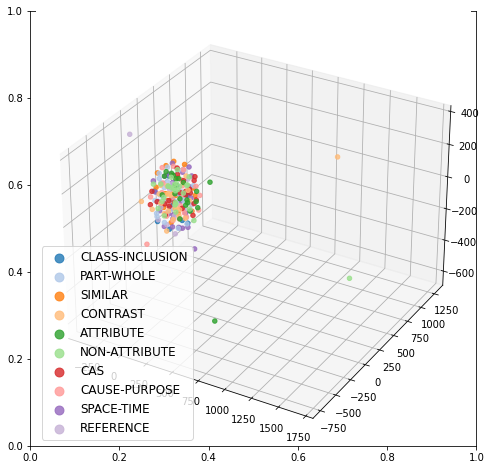

In [179]:
analyse_tsne_clusters(sem_eval_df)

In [180]:
sem_eval_df1.isna().sum()

node1_label          0
node2_label          0
relation             0
subrelation          0
other_node1_label    0
other_node2_label    0
file_id              0
explanation          0
other_relation       0
node1                0
node2                0
other_node1          0
other_node2          0
diffArr1             0
diffArr2             0
cosSim               0
dtype: int64

In [181]:
sem_eval_df1.relation.value_counts()

SPACE-TIME         28
CAS                24
CONTRAST           22
PART-WHOLE         22
CAUSE-PURPOSE      20
NON-ATTRIBUTE      18
ATTRIBUTE          16
SIMILAR            16
CLASS-INCLUSION    12
REFERENCE           9
Name: relation, dtype: int64

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Train, Val accuracies for relation ([0.9988095238095237], [0.5716374269005848])


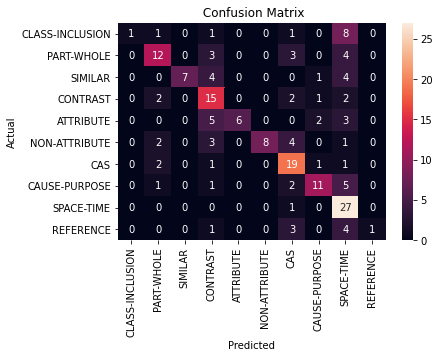

In [182]:
print("Train, Val accuracies for relation", train_embed_analogy_svc(sem_eval_df1, 'relation', 100))

In [183]:
generate_google_proj_files(sem_eval_df, 'sem_eval.complex')

Extracted 215 embeddings
Saved emb file: ../data/analogical_proj/emb_files_for_google_projections/sem_eval.complex.emb.Nov_22_2021.tsv
Saved labels file: ../data/analogical_proj/emb_files_for_google_projections/sem_eval.complex.lab.Nov_22_2021.tsv


## GLOVE analysis

In [184]:
sem_eval_df_cosSimed_glove = sem_eval_df_og1.join(get_results(sem_eval_df_og1, model_glove))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [185]:
sem_eval_df_cosSimed_glove[sem_eval_df_cosSimed_glove.cosSim == 0]

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2


In [186]:
sem_eval_df_cosSimed_glove[sem_eval_df_cosSimed_glove.cosSim > 0.5]

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2


In [187]:
sem_eval_df_cosSimed_glove.cosSim.describe()

count    187.000000
mean       0.057820
std        0.119609
min       -0.303027
25%       -0.021787
50%        0.058007
75%        0.140080
max        0.391820
Name: cosSim, dtype: float64

<AxesSubplot:>

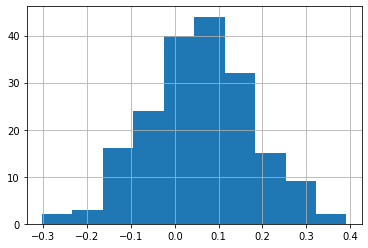

In [188]:
sem_eval_df_cosSimed_glove.cosSim.hist()

Extracted 192 embeddings
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 3.058070
[t-SNE] KL divergence after 250 iterations with early exaggeration: 131.560303
[t-SNE] KL divergence after 1000 iterations: 1.596258


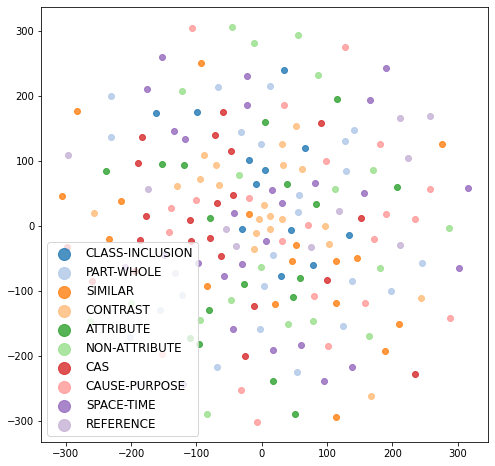

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 3.058070
[t-SNE] KL divergence after 250 iterations with early exaggeration: 200.564728
[t-SNE] KL divergence after 1000 iterations: 3.418954


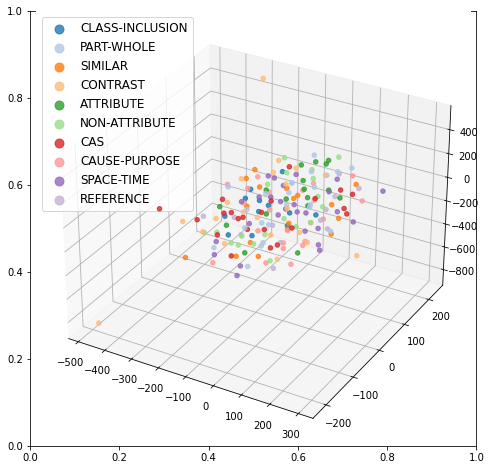

In [189]:
analyse_tsne_clusters(sem_eval_df_cosSimed_glove)

In [190]:
sem_eval_df_cosSimed_glove[sem_eval_df_cosSimed_glove.diffArr1.isna()]

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2


/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Train, Val accuracies for relation ([1.0], [0.6625730994152047])


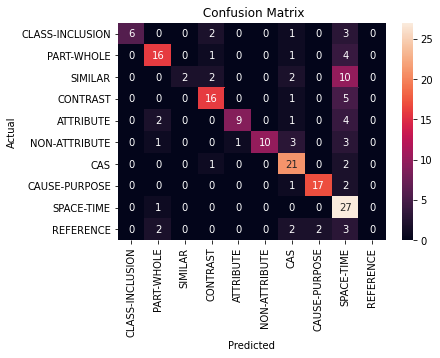

In [191]:
print("Train, Val accuracies for relation", train_embed_analogy_svc(sem_eval_df_cosSimed_glove, 'relation', 300))

In [192]:
generate_google_proj_files(sem_eval_df_cosSimed_glove, 'sem_eval.glove')

Extracted 192 embeddings
Saved emb file: ../data/analogical_proj/emb_files_for_google_projections/sem_eval.glove.emb.Nov_22_2021.tsv
Saved labels file: ../data/analogical_proj/emb_files_for_google_projections/sem_eval.glove.lab.Nov_22_2021.tsv


## W2vec analysis

In [193]:
sem_eval_cosSimed_w2vec = sem_eval_df_og1.join(get_results(sem_eval_df_og1, model_w2v))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [194]:
sem_eval_cosSimed_w2vec[sem_eval_cosSimed_w2vec.cosSim == 0]

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2


In [195]:
sem_eval_cosSimed_w2vec.cosSim.describe()

count    187.000000
mean       0.067705
std        0.107593
min       -0.249458
25%       -0.005069
50%        0.070688
75%        0.142101
max        0.338888
Name: cosSim, dtype: float64

<AxesSubplot:>

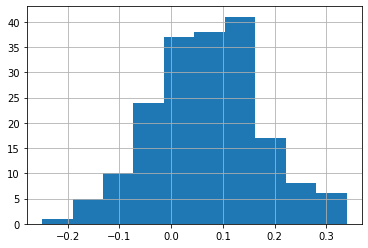

In [196]:
sem_eval_cosSimed_w2vec.cosSim.hist()

Extracted 192 embeddings
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 1.567020
[t-SNE] KL divergence after 250 iterations with early exaggeration: 129.161621
[t-SNE] KL divergence after 1000 iterations: 2.187767


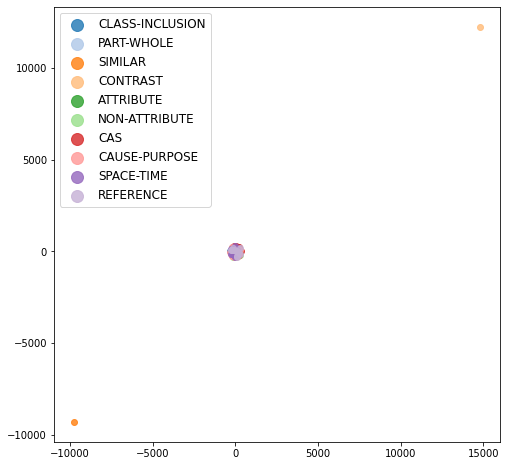

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 1.567020
[t-SNE] KL divergence after 250 iterations with early exaggeration: 210.302521
[t-SNE] KL divergence after 1000 iterations: 3.775946


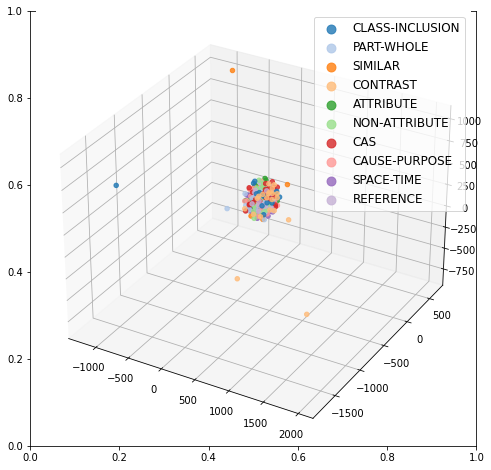

In [197]:
analyse_tsne_clusters(sem_eval_cosSimed_w2vec)

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Train, Val accuracies for relation ([1.0], [0.737719298245614])


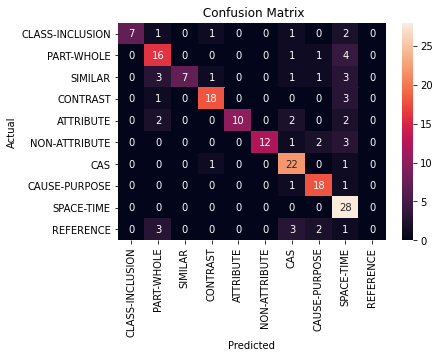

In [198]:
print("Train, Val accuracies for relation", train_embed_analogy_svc(sem_eval_cosSimed_w2vec, 'relation', 300))

In [199]:
generate_google_proj_files(sem_eval_cosSimed_w2vec, 'sem_eval.w2vec')

Extracted 192 embeddings
Saved emb file: ../data/analogical_proj/emb_files_for_google_projections/sem_eval.w2vec.emb.Nov_22_2021.tsv
Saved labels file: ../data/analogical_proj/emb_files_for_google_projections/sem_eval.w2vec.lab.Nov_22_2021.tsv


## BERT analysis

### node1_label node1_desc is related to node2_label node2_desc

In [200]:
sem_eval_cosSimed_bert = get_bert_based_cosSim(sem_eval_df_og1, 'sentence-transformers/all-distilroberta-v1', 1)

0it [00:00, ?it/s]

Exception when trying to download https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip not found. Try to create it from scratch
Try to create Transformer Model sentence-transformers/all-distilroberta-v1 with mean pooling
Exception when trying to download https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip not found. Try to create it from scratch
Try to create Transformer Model sentence-transformers/all-distilroberta-v1 with mean pooling


In [201]:
sem_eval_cosSimed_bert.cosSim.describe()

count    187.000000
mean       0.147912
std        0.101071
min       -0.041260
25%        0.067679
50%        0.141265
75%        0.204180
max        0.447409
Name: cosSim, dtype: float64

<AxesSubplot:>

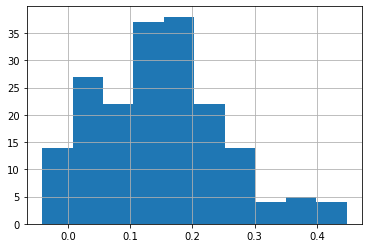

In [202]:
sem_eval_cosSimed_bert.cosSim.hist()

In [203]:
sem_eval_cosSimed_bert['diffArr1'] = sem_eval_cosSimed_bert['pair1_emb']
sem_eval_cosSimed_bert['diffArr2'] = sem_eval_cosSimed_bert['pair2_emb']

Extracted 192 embeddings
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 3.064967
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.655563
[t-SNE] KL divergence after 1000 iterations: 0.970731


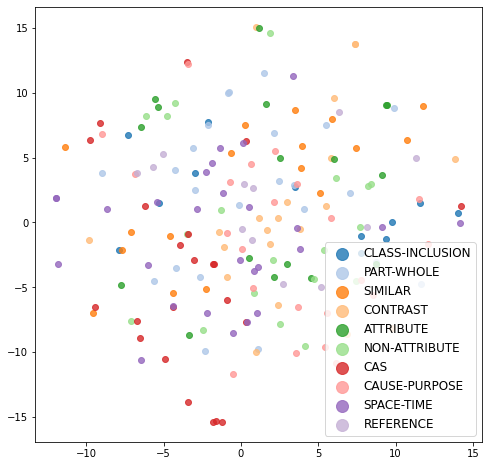

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 192 samples in 0.000s...
[t-SNE] Computed neighbors for 192 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 192 / 192
[t-SNE] Mean sigma: 3.064967
[t-SNE] KL divergence after 250 iterations with early exaggeration: 162.040085
[t-SNE] KL divergence after 1000 iterations: 2.561015


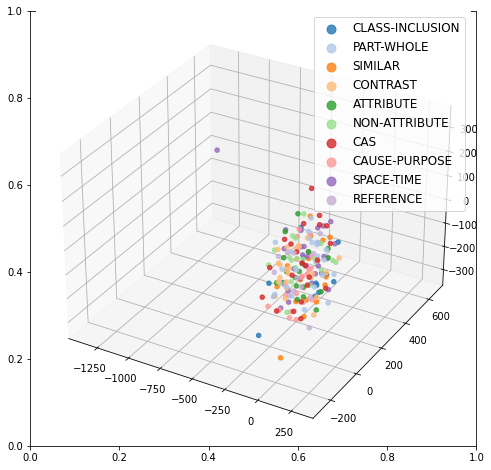

In [204]:
analyse_tsne_clusters(sem_eval_cosSimed_bert)

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Train, Val accuracies for relation ([1.0], [0.7219298245614035])


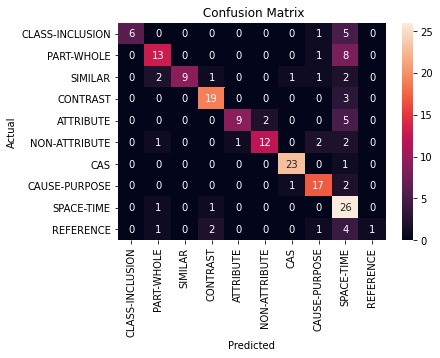

In [205]:
print("Train, Val accuracies for relation", train_embed_analogy_svc(sem_eval_cosSimed_bert, 'relation', 768))

In [206]:
generate_google_proj_files(sem_eval_cosSimed_bert, 'sem_eval.bert')

Extracted 192 embeddings
Saved emb file: ../data/analogical_proj/emb_files_for_google_projections/sem_eval.bert.emb.Nov_22_2021.tsv
Saved labels file: ../data/analogical_proj/emb_files_for_google_projections/sem_eval.bert.lab.Nov_22_2021.tsv


## Fetch Embeddings

In [207]:
def getSentEmbeddings(valSeries, modelName):
    model = SentenceTransformer(modelName)
    start = time()
    encodings = model.encode(valSeries, show_progress_bar=True, batch_size=500)
    return encodings
modelName = 'sentence-transformers/all-distilroberta-v1'

In [210]:
sem_eval_df['pair1_emb'] = pd.Series(list(getSentEmbeddings(sem_eval_df.apply(lambda p:p.node1_label + ' ' + p.node2_label, axis=1), modelName)))
sem_eval_df['pair2_emb'] = pd.Series(list(getSentEmbeddings(sem_eval_df.apply(lambda p:p.other_node1_label + ' ' + p.other_node2_label, axis=1), modelName)))

Exception when trying to download https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip not found. Try to create it from scratch
Try to create Transformer Model sentence-transformers/all-distilroberta-v1 with mean pooling


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Exception when trying to download https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip. Response 404
SentenceTransformer-Model https://sbert.net/models/sentence-transformers/all-distilroberta-v1.zip not found. Try to create it from scratch
Try to create Transformer Model sentence-transformers/all-distilroberta-v1 with mean pooling


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [212]:
sem_eval_df['cosSim'] = sem_eval_df.apply(lambda p: cosine_similarity(p.pair1_emb.reshape(1, -1), p.pair2_emb.reshape(1, -1))[0][0], axis=1)

In [213]:
sem_eval_df

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,diffArr1,diffArr2,cosSim,pair1_emb,pair2_emb
0,ornament,brooch,CLASS-INCLUSION,Functional,weapon,knife,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q728,Q32489,"[-0.60044688, -0.2915966510000001, -0.68566801...","[-0.545061916, 0.4472830899999999, 0.037000953...",0.312673,"[0.04701927, -0.38067174, -0.19809063, -0.3155...","[0.4204868, 0.21265705, -0.48564187, 1.7052386..."
1,ornament,brooch,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q42889,Q100147763,"[-0.60044688, -0.2915966510000001, -0.68566801...","[0.895021855, 0.38843967, -0.576452642, -0.191...",0.124428,"[0.04701927, -0.38067174, -0.19809063, -0.3155...","[0.05365447, 0.28064126, -0.21829645, 0.231544..."
2,weapon,knife,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q728,Q32489,Q42889,Q100147763,"[-0.545061916, 0.4472830899999999, 0.037000953...","[0.895021855, 0.38843967, -0.576452642, -0.191...",0.229004,"[0.4204868, 0.21265705, -0.48564187, 1.7052386...","[0.05365447, 0.28064126, -0.21829645, 0.231544..."
3,cutlery,spoon,CLASS-INCLUSION,Singular,clothing,shirt,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q11460,Q76768,"[-0.100445211, 0.29185074600000005, -0.4594371...","[0.211987704, 0.8644514680000001, -0.810434222...",0.199923,"[-0.13947035, -0.69040674, 0.0033031523, 0.648...","[-0.06683705, -0.8689275, -0.22711006, 0.36028..."
4,cutlery,spoon,CLASS-INCLUSION,Singular,vermin,rat,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q1192197,Q16965317,"[-0.100445211, 0.29185074600000005, -0.4594371...","[-0.09306335399999999, 0.259244382, -0.2934440...",0.150845,"[-0.13947035, -0.69040674, 0.0033031523, 0.648...","[0.1740062, 0.2162225, -0.1128855, 0.9023919, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,psychology,minds,REFERENCE,Knowledge,ballistics,projectiles,10(e),X is the name for knowledge of Y,REFERENCE,Q9418,Q450,Q184631,Q49393,"[-0.705540523, 0.449901283, -0.257556066000000...","[-0.30856172800000004, -0.03209030699999993, -...",0.076775,"[-0.3325986, -0.3646737, 0.4512872, -0.5330419...","[-0.079335116, 0.19193885, -0.15021107, 0.7095..."
230,astronomy,stars,REFERENCE,Knowledge,ballistics,projectiles,10(e),X is the name for knowledge of Y,REFERENCE,Q333,Q25962599,Q184631,Q49393,"[-0.069325462, -0.08552381399999998, -1.043445...","[-0.30856172800000004, -0.03209030699999993, -...",0.078265,"[-0.03460842, -0.6998418, -0.23256098, -0.2533...","[-0.079335116, 0.19193885, -0.15021107, 0.7095..."
231,alias,name,REFERENCE,Concealment,camouflage,location,10(f),X conceals a person/place/thing's Y,REFERENCE,Q285142,Q105221875,Q196113,Q17334923,"[0.147587027, -0.232398569, 0.0664959659999999...","[-0.26540181099999993, 0.41649645600000007, -0...",0.051688,"[0.14422189, 0.46061915, -0.32645497, 0.020609...","[-0.37612346, -0.32146043, -0.07657953, 0.1454..."
232,alias,name,REFERENCE,Concealment,disguise,identity,10(f),X conceals a person/place/thing's Y,REFERENCE,Q285142,Q105221875,Q18457349,Q254474,"[0.147587027, -0.232398569, 0.0664959659999999...","[-0.330613636, -0.19259607800000011, 0.4966676...",0.330219,"[0.14422189, 0.46061915, -0.32645497, 0.020609...","[0.1823498, 0.034273297, -0.14748192, -0.50771..."


In [214]:
idx = sem_eval_df.groupby(by=['node1', 'node2'])['cosSim'].transform(max) == sem_eval_df['cosSim']
sem_eval_df1 = sem_eval_df[idx]

In [215]:
sem_eval_df1

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,diffArr1,diffArr2,cosSim,pair1_emb,pair2_emb
0,ornament,brooch,CLASS-INCLUSION,Functional,weapon,knife,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q728,Q32489,"[-0.60044688, -0.2915966510000001, -0.68566801...","[-0.545061916, 0.4472830899999999, 0.037000953...",0.312673,"[0.04701927, -0.38067174, -0.19809063, -0.3155...","[0.4204868, 0.21265705, -0.48564187, 1.7052386..."
2,weapon,knife,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q728,Q32489,Q42889,Q100147763,"[-0.545061916, 0.4472830899999999, 0.037000953...","[0.895021855, 0.38843967, -0.576452642, -0.191...",0.229004,"[0.4204868, 0.21265705, -0.48564187, 1.7052386...","[0.05365447, 0.28064126, -0.21829645, 0.231544..."
3,cutlery,spoon,CLASS-INCLUSION,Singular,clothing,shirt,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q11460,Q76768,"[-0.100445211, 0.29185074600000005, -0.4594371...","[0.211987704, 0.8644514680000001, -0.810434222...",0.199923,"[-0.13947035, -0.69040674, 0.0033031523, 0.648...","[-0.06683705, -0.8689275, -0.22711006, 0.36028..."
5,clothing,shirt,CLASS-INCLUSION,Singular,vermin,rat,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q11460,Q76768,Q1192197,Q16965317,"[0.211987704, 0.8644514680000001, -0.810434222...","[-0.09306335399999999, 0.259244382, -0.2934440...",0.173101,"[-0.06683705, -0.8689275, -0.22711006, 0.36028...","[0.1740062, 0.2162225, -0.1128855, 0.9023919, ..."
7,groceries,eggs,CLASS-INCLUSION,Plural,refreshments,sandwiches,1(d),Y are items in a collection/group of X,CLASS-INCLUSION,Q951964,Q2196354,Q749316,Q28803,"[0.352215339, -0.37305098699999995, 0.14477919...","[-0.295730818, 0.15128338399999985, 1.35261884...",0.293885,"[0.3632139, -0.10987296, 0.11260971, -0.138012...","[0.44386104, -0.62885505, -0.27822492, -0.4596..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,syllabus,course,REFERENCE,Plan,blueprint,building,10(d),an X is a plan for Y,REFERENCE,Q935222,Q11631711,Q422321,Q41176,None,"[-0.24852253000000002, -0.558518052, 0.2144407...",0.234720,"[0.41646457, -0.5335183, -0.36106655, 1.107403...","[-0.16429849, -0.45136517, 0.028145824, -0.303..."
229,psychology,minds,REFERENCE,Knowledge,ballistics,projectiles,10(e),X is the name for knowledge of Y,REFERENCE,Q9418,Q450,Q184631,Q49393,"[-0.705540523, 0.449901283, -0.257556066000000...","[-0.30856172800000004, -0.03209030699999993, -...",0.076775,"[-0.3325986, -0.3646737, 0.4512872, -0.5330419...","[-0.079335116, 0.19193885, -0.15021107, 0.7095..."
230,astronomy,stars,REFERENCE,Knowledge,ballistics,projectiles,10(e),X is the name for knowledge of Y,REFERENCE,Q333,Q25962599,Q184631,Q49393,"[-0.069325462, -0.08552381399999998, -1.043445...","[-0.30856172800000004, -0.03209030699999993, -...",0.078265,"[-0.03460842, -0.6998418, -0.23256098, -0.2533...","[-0.079335116, 0.19193885, -0.15021107, 0.7095..."
232,alias,name,REFERENCE,Concealment,disguise,identity,10(f),X conceals a person/place/thing's Y,REFERENCE,Q285142,Q105221875,Q18457349,Q254474,"[0.147587027, -0.232398569, 0.0664959659999999...","[-0.330613636, -0.19259607800000011, 0.4966676...",0.330219,"[0.14422189, 0.46061915, -0.32645497, 0.020609...","[0.1823498, 0.034273297, -0.14748192, -0.50771..."


## New MCQ task

In [282]:
len(sem_eval_df)

234

In [230]:
sem_eval_df_og1.head()

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2
0,ornament,brooch,CLASS-INCLUSION,Functional,weapon,knife,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q728,Q32489
1,ornament,brooch,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q42889,Q100147763
2,weapon,knife,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q728,Q32489,Q42889,Q100147763
3,cutlery,spoon,CLASS-INCLUSION,Singular,clothing,shirt,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q11460,Q76768
4,cutlery,spoon,CLASS-INCLUSION,Singular,vermin,rat,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q1192197,Q16965317


In [231]:
len(sem_eval_df_og1)

187

In [232]:
same_category_adj_list = defaultdict(set)
candidates = set()
for _, row in sem_eval_df_og1.iterrows():
    candidates.add((row.node1_label, row.node2_label))
    candidates.add((row.other_node1_label, row.other_node2_label))
    
    same_category_adj_list[(row.node1_label, row.node2_label)].add((row.other_node1_label, row.other_node2_label))
    same_category_adj_list[(row.other_node1_label, row.other_node2_label)].add((row.node1_label, row.node2_label))
candidates = list(candidates)

In [233]:
import random
lines = []
for _, row in sem_eval_df_og1.iterrows():
    count_added = 0
    choice = [[row.other_node1_label, row.other_node2_label]]
    stem = [row.node1_label, row.node2_label]
    answer = 0
    
    for cand in random.sample(candidates, 6):
        if cand in same_category_adj_list[(row.node1_label, row.node2_label)]:
            continue
        else:
            choice.append(list(cand))
        count_added += 1
        if count_added == 3:
            break
        
    assert count_added == 3
    lines.append(json.dumps({'stem': stem, 'answer': answer, 'choice': choice, 'prefix': 'SemEval-2012'}) + '\n')

In [272]:
with open('./analogy-language-model/analogy_test_dataset_with_prediction/sat/test.jsonl', 'w') as f:
    f.writelines(lines)

In [235]:
sem_eval_df_cosSimed_glove = sem_eval_df_og1.join(get_results(sem_eval_df_og1, model_glove))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [236]:
sem_eval_df_cosSimed_glove.head()

,node1_label,node2_label,relation,subrelation,other_node1_label,other_node2_label,file_id,explanation,other_relation,node1,node2,other_node1,other_node2,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2
0,ornament,brooch,CLASS-INCLUSION,Functional,weapon,knife,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q728,Q32489,-0.008491,"[-0.111486, 0.32909, -0.02245, -0.40161002, 0....",1,1,"[0.065542, 0.32584, 0.19716, -0.44538, -0.2139...",1,1
1,ornament,brooch,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q335261,Q499916,Q42889,Q100147763,-0.119651,"[-0.111486, 0.32909, -0.02245, -0.40161002, 0....",1,1,"[-0.34726, -0.401577, 0.246572, 0.39491, -0.32...",1,1
2,weapon,knife,CLASS-INCLUSION,Functional,vehicle,car,1(b),Y functions as an X,CLASS-INCLUSION,Q728,Q32489,Q42889,Q100147763,0.179804,"[0.065542, 0.32584, 0.19716, -0.44538, -0.2139...",1,1,"[-0.34726, -0.401577, 0.246572, 0.39491, -0.32...",1,1
3,cutlery,spoon,CLASS-INCLUSION,Singular,clothing,shirt,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q11460,Q76768,0.232317,"[0.091713995, 0.54406, -0.41967, -0.17462999, ...",1,1,"[0.29981, 0.18748799, -0.19137001, 0.217843, 0...",1,1
4,cutlery,spoon,CLASS-INCLUSION,Singular,vermin,rat,1(c),a Y is one item in a collection/group of X,CLASS-INCLUSION,Q81944,Q20164712,Q1192197,Q16965317,0.113317,"[0.091713995, 0.54406, -0.41967, -0.17462999, ...",1,1,"[0.18696201, -0.56382, 0.33385, 0.64866996, -0...",1,1


In [237]:
delta_emb = {}
for _, row in sem_eval_df_cosSimed_glove.iterrows():
    delta_emb[(row['node1_label'], row['node2_label'])] = row['diffArr1']
    delta_emb[(row['other_node1_label'], row['other_node2_label'])] = row['diffArr1']

In [289]:
def eval_alm_acc(lines, delta_emb):
    acc = 0
    for row in lines:
        row = json.loads(row.strip())
        stem_emb = delta_emb[(row['stem'][0], row['stem'][1])]
        cos_sims = {}
        target = delta_emb[row['choice'][0][0], row['choice'][0][1]]
        target_cos_sim = cosine_similarity(stem_emb.reshape(1, -1), target.reshape(1, -1))[0][0]
        for i in range(1,len(row['choice'])):
            cand = row['choice'][i]
            cand_emb = delta_emb[(cand[0], cand[1])]
            cos_sim = cosine_similarity(stem_emb.reshape(1, -1), cand_emb.reshape(1, -1))[0][0]
            cos_sims[tuple(cand)] = cos_sim
        max_cos_sim = max(cos_sims.values())
        if target_cos_sim >= max_cos_sim:
            acc += 1
    print(acc / len(lines))
eval_alm_acc(lines, delta_emb)

0.6470588235294118


In [239]:
lines

['{"stem": ["ornament", "brooch"], "answer": 0, "choice": [["weapon", "knife"], ["smooth", "rough"], ["rivet", "girder"], ["coda", "symphony"]], "prefix": "SemEval-2012"}\n',
 '{"stem": ["ornament", "brooch"], "answer": 0, "choice": [["vehicle", "car"], ["perfection", "fault"], ["river", "Nile"], ["war", "tranquility"]], "prefix": "SemEval-2012"}\n',
 '{"stem": ["weapon", "knife"], "answer": 0, "choice": [["vehicle", "car"], ["mountain", "foot"], ["childhood", "play"], ["patient", "stethoscope"]], "prefix": "SemEval-2012"}\n',
 '{"stem": ["cutlery", "spoon"], "answer": 0, "choice": [["clothing", "shirt"], ["fence", "property"], ["drink", "potable"], ["lateness", "hurry"]], "prefix": "SemEval-2012"}\n',
 '{"stem": ["cutlery", "spoon"], "answer": 0, "choice": [["vermin", "rat"], ["remember", "forget"], ["brittle", "break"], ["doctor", "patient"]], "prefix": "SemEval-2012"}\n',
 '{"stem": ["clothing", "shirt"], "answer": 0, "choice": [["vermin", "rat"], ["recluse", "socialize"], ["gaze", 

In [290]:
delta_glove_emb = {}
for _, row in sem_eval_df_cosSimed_glove.iterrows():
    delta_glove_emb[(row['node1_label'], row['node2_label'])] = get_dict_embeddings(row['node1_label'], model_glove)[0] - get_dict_embeddings(row['node2_label'], model_glove)[0]
    delta_glove_emb[(row['other_node1_label'], row['other_node2_label'])] = get_dict_embeddings(row['other_node1_label'], model_glove)[0] - get_dict_embeddings(row['other_node2_label'], model_glove)[0]
eval_alm_acc(lines, delta_glove_emb)

0.44385026737967914


In [291]:
delta_w2vec_emb = {}
for _, row in sem_eval_df_cosSimed_glove.iterrows():
    delta_w2vec_emb[(row['node1_label'], row['node2_label'])] = get_dict_embeddings(row['node1_label'], model_w2v)[0] - get_dict_embeddings(row['node2_label'], model_w2v)[0]
    delta_w2vec_emb[(row['other_node1_label'], row['other_node2_label'])] = get_dict_embeddings(row['other_node1_label'], model_w2v)[0] - get_dict_embeddings(row['other_node2_label'], model_w2v)[0]
eval_alm_acc(lines, delta_w2vec_emb)

0.5187165775401069


## Perl Scripts - Generate Turker Ratings

In [298]:
for num, alpha in tqdm(product(range(1,11), ascii_lowercase)):
    num = str(num)
    
    if not(os.path.exists(SEM_EVAL_FILEPATH + '/Testing/Phase2Answers/' + 'Phase2Answers-' + num + alpha + '.txt')):
        continue
    os.system(f"perl {SEM_EVAL_FILEPATH}/maxdiff_to_scale.pl {SEM_EVAL_FILEPATH + '/Testing/Phase2Answers/' + 'Phase2Answers-' + num + alpha + '.txt'} {SEM_EVAL_FILEPATH + '/Examples/TurkerScaled-' + num + alpha + '.txt'}")

0it [00:00, ?it/s]

In [322]:
from itertools import combinations, product
from string import ascii_lowercase
import os

dataset = []

for num, alpha in product(range(1,11), ascii_lowercase):
    num = str(num)
    
    if not(os.path.exists(SEM_EVAL_FILEPATH + '/Testing/Phase1Questions/' + 'Phase1Questions-' + num + alpha + '.txt')) or \
        not(os.path.exists(SEM_EVAL_FILEPATH + '/Examples/' + 'TurkerScaled-' + num + alpha + '.txt')):
        continue
    try:
        with open(SEM_EVAL_FILEPATH + '/Testing/Phase1Questions/' + 'Phase1Questions-' + num + alpha + '.txt') as sem_eval_f:
            lines = sem_eval_f.readlines()
            line1 = lines[0].strip().split()
            file_id, class_relation, relation = line1[1], line1[2][:-1], line1[3]
            line_num = 0
            for i, line in enumerate(lines):
                if "What relation best describes" in line:
                    line_num = i
                    break
            examples = []
            for line in lines[4:line_num-1]:
                for pair in line.strip().split('.'):
                    examples.append([pair_elem.strip() for pair_elem in pair.split(':')])
#             examples = [[pair_elem for pair_elem in pair.strip().split(':')] for pair in lines[4:7]]
            for i, line in enumerate(lines):
                if "Correct Answer" in line:
                    line_num = i + 2
                    break
            explanation = lines[line_num].strip()
        #     print(line1, examples, explanation)
        with open(SEM_EVAL_FILEPATH + '/Examples/' + 'TurkerScaled-' + num + alpha + '.txt') as sem_eval_f:
            lines = sem_eval_f.readlines()[11:]
            answer_pairs = {}
            for line in lines:
                score, pair_elem = line.strip().split()
                answer_pairs[tuple(pair_elem[1:-1].split(':'))] = float(score)
        #     print(answer_pairs)
        for i, pair in enumerate(examples):
            for ans_pair, score in answer_pairs.items():
                dataset.append([pair[0], pair[1], class_relation, relation, file_id, i+1, explanation, ans_pair[0], ans_pair[1], score])
#         print(dataset)
    except Exception as err:
        print(SEM_EVAL_FILEPATH + '/Testing/Phase1Questions/' + 'Phase1Questions-' + num + alpha + '.txt')
        print(SEM_EVAL_FILEPATH + '/Testing/Phase1Answers/' + 'Phase1Answers-' + num + alpha + '.txt')
        print(lines)
        raise(err)

In [326]:
sem_eval_df_turked = pd.DataFrame(dataset, columns=['node1_label', 'node2_label', 'class', 'relation', 'file_id', 'Q pair num', 'explanation', 'other_node1_label', 'other_node2_label', 'score'])

In [327]:
sem_eval_df_turked.head()

,node1_label,node2_label,class,relation,file_id,Q pair num,explanation,other_node1_label,other_node2_label,score
0,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,tool,hammer,74.0
1,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,tool,screwdriver,56.0
2,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,tool,chisel,55.1
3,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,utensil,spoon,36.0
4,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,fruit,apple,34.0


In [328]:
len(sem_eval_df_turked)

8692

## GLOVE Linking

In [331]:
sem_eval_df_turked_glove = sem_eval_df_turked.join(get_results(sem_eval_df_turked, model_glove))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [333]:
sem_eval_df_turked_glove['score'] = sem_eval_df_turked_glove.score / 100

In [334]:
sem_eval_df_turked_glove.head()

,node1_label,node2_label,class,relation,file_id,Q pair num,explanation,other_node1_label,other_node2_label,score,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2
0,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,tool,hammer,0.740,0.084047,"[-0.111486, 0.32909, -0.02245, -0.40161002, 0....",1,1,"[-0.28238702, 0.016270012, 0.85921997, -0.7470...",1,1
1,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,tool,screwdriver,0.560,0.147613,"[-0.111486, 0.32909, -0.02245, -0.40161002, 0....",1,1,"[0.076213, 0.042610005, 0.85026, -0.44985, 0.0...",1,1
2,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,tool,chisel,0.551,0.055351,"[-0.111486, 0.32909, -0.02245, -0.40161002, 0....",1,1,"[-0.230087, 0.55795, 0.75804996, 0.031540036, ...",1,1
3,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,utensil,spoon,0.360,0.033226,"[-0.111486, 0.32909, -0.02245, -0.40161002, 0....",1,1,"[0.113926895, 0.51463, -0.621347, 0.01921001, ...",1,1
4,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,fruit,apple,0.340,0.052256,"[-0.111486, 0.32909, -0.02245, -0.40161002, 0....",1,1,"[0.37247998, 0.38679802, 0.014691003, 0.442540...",1,1


In [336]:
stats.spearmanr(sem_eval_df_turked_glove['score'], sem_eval_df_turked_glove['cosSim']).correlation

0.23896600510013

In [341]:
sem_eval_df_turked_glove_grouped = sem_eval_df_turked_glove.groupby(['file_id', 'other_node1_label', 'other_node2_label', 'score']).mean()

In [343]:
sem_eval_df_turked_glove_grouped = sem_eval_df_turked_glove_grouped.reset_index()

In [344]:
sem_eval_df_turked_glove_grouped.head()

,file_id,other_node1_label,other_node2_label,score,Q pair num,cosSim,childLen1,parLen1,childLen2,parLen2
0,1(b),animal,dog,-0.02,2.0,0.102027,1.0,1.0,1.0,1.0
1,1(b),apple,food,-0.42,2.0,-0.033835,1.0,1.0,1.0,1.0
2,1(b),appliance,fridge,0.08,2.0,0.087476,1.0,1.0,1.0,1.0
3,1(b),artwork,sculpture,0.06,2.0,0.017397,1.0,1.0,1.0,1.0
4,1(b),beverage,water,0.12,2.0,-0.021630,1.0,1.0,1.0,1.0


In [345]:
stats.spearmanr(sem_eval_df_turked_glove_grouped['score'], sem_eval_df_turked_glove_grouped['cosSim']).correlation

0.3365159341486169

## W2VEC Linking

In [356]:
sem_eval_df_turked_w2vec = sem_eval_df_turked.join(get_results(sem_eval_df_turked, model_w2v))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [357]:
sem_eval_df_turked_w2vec['score'] = sem_eval_df_turked_w2vec.score / 100

In [358]:
sem_eval_df_turked_w2vec.head()

,node1_label,node2_label,class,relation,file_id,Q pair num,explanation,other_node1_label,other_node2_label,score,cosSim,diffArr1,childLen1,parLen1,diffArr2,childLen2,parLen2
0,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,tool,hammer,0.740,0.044446,"[0.06347656, 0.1628418, -0.18164062, -0.135742...",1,1,"[0.16796875, -0.41064453, 0.03173828, 0.023803...",1,1
1,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,tool,screwdriver,0.560,0.066813,"[0.06347656, 0.1628418, -0.18164062, -0.135742...",1,1,"[0.38232422, -0.10480499, 0.10424805, 0.120239...",1,1
2,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,tool,chisel,0.551,-0.001836,"[0.06347656, 0.1628418, -0.18164062, -0.135742...",1,1,"[0.21582031, -0.43017578, 0.11303711, -0.14440...",1,1
3,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,utensil,spoon,0.360,0.099410,"[0.06347656, 0.1628418, -0.18164062, -0.135742...",1,1,"[-0.29663086, 0.075927734, 0.18945312, 0.11273...",1,1
4,ornament,brooch,CLASS-INCLUSION,Functional,1(b),1,Y functions as an X,fruit,apple,0.340,0.006285,"[0.06347656, 0.1628418, -0.18164062, -0.135742...",1,1,"[0.0061035156, 0.22802734, -0.041870117, 0.199...",1,1


In [359]:
stats.spearmanr(sem_eval_df_turked_w2vec['score'], sem_eval_df_turked_w2vec['cosSim']).correlation

0.2938241930443023

In [360]:
sem_eval_df_turked_w2vec_grouped = sem_eval_df_turked_w2vec.groupby(['file_id', 'other_node1_label', 'other_node2_label', 'score']).mean()

In [361]:
sem_eval_df_turked_w2vec_grouped = sem_eval_df_turked_w2vec_grouped.reset_index()

In [362]:
sem_eval_df_turked_w2vec_grouped.head()

,file_id,other_node1_label,other_node2_label,score,Q pair num,cosSim,childLen1,parLen1,childLen2,parLen2
0,1(b),animal,dog,-0.02,2.0,0.099410,1.0,1.0,1.0,1.0
1,1(b),apple,food,-0.42,2.0,-0.019434,1.0,1.0,1.0,1.0
2,1(b),appliance,fridge,0.08,2.0,0.108104,1.0,1.0,1.0,1.0
3,1(b),artwork,sculpture,0.06,2.0,0.025146,1.0,1.0,1.0,1.0
4,1(b),beverage,water,0.12,2.0,0.031579,1.0,1.0,1.0,1.0


In [363]:
stats.spearmanr(sem_eval_df_turked_w2vec['score'], sem_eval_df_turked_w2vec['cosSim']).correlation

0.2938241930443023

In [355]:
len(sem_eval_df_turked_w2vec)

2791

## 

In [369]:
for num, alpha in tqdm(product(range(1,11), ascii_lowercase)):
    num = str(num)
    
    if not(os.path.exists(SEM_EVAL_FILEPATH + '/Testing/Phase1Questions/' + 'Phase1Questions-' + num + alpha + '.txt')) or \
        not(os.path.exists(SEM_EVAL_FILEPATH + '/Examples/' + 'TurkerScaled-' + num + alpha + '.txt')):
        continue
#     try:
    with open(SEM_EVAL_FILEPATH + '/Examples/' + 'RandomScaled-' + num + alpha + '.txt', 'w') as sem_pred_f:
        subset = sem_eval_df_turked_w2vec_grouped[sem_eval_df_turked_w2vec_grouped['file_id'] == num+'('+alpha+')']
        subset = subset.sort_values(by=['cosSim'], ascending=False)
        subset['cosSim'] = subset['cosSim'].apply(lambda p: round(p * 100, 2))
        for _, row in subset.iterrows():
            sem_pred_f.write(' {} "{}:{}"\n'.format(row['cosSim'], row['other_node1_label'], row['other_node2_label']))

0it [00:00, ?it/s]

In [ ]:
for num, alpha in tqdm(product(range(1,11), ascii_lowercase)):
    num = str(num)
    
    if not(os.path.exists(SEM_EVAL_FILEPATH + '/Testing/Phase2Questions/' + 'Phase2Questions-' + num + alpha + '.txt')):
        continue
    os.system(f"perl {SEM_EVAL_FILEPATH}/scale_to_maxdiff.pl {SEM_EVAL_FILEPATH + '/Testing/Phase2Questions/' + 'Phase2Questions-' + num + alpha + '.txt'} {SEM_EVAL_FILEPATH + '/Examples/scale_to_maxdiff-' + num + alpha + '.txt'}")

## Attempt to map to nodes